<a href="https://colab.research.google.com/github/FarahRadwan/MachineLearning/blob/main/GUC_Kmeans3_Assignment2_43_3247_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance
import random

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [37]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
     if Distance_Type=="Ecluidian_distance":
       Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids ,'euclidean')
       
     if Distance_Type=="pearson":
        #Cluster_Distance = np.corrcoef(Data_points,Cluster_Centroids)
         Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids ,'correlation')
         Cluster_Distance=np.nan_to_num(Cluster_Distance, copy=True)
         #print(Cluster_Distance)
     if Distance_Type=="pearsond":
        Cluster_Distance=np.zeros((len(Data_points),len(Cluster_Centroids)))
        for i in range(len(Cluster_Centroids)):
            for j in range(len(Data_points)):
                Cluster_Distance[j][i]=1 - ((np.sum((Cluster_Centroids[i]- np.mean(Cluster_Centroids))*(Data_points[j]- np.mean(Data_points))))
                /((np.sqrt(np.sum(np.square(Cluster_Centroids[i]- np.mean(Cluster_Centroids)))*(np.sum(np.square(Data_points[j]- np.mean(Data_points))))))))
        #Cluster_Distance=np.nan_to_num(Cluster_Distance, copy=True)
     if Distance_Type=="pearsond1":
        Cluster_Distance=np.zeros((len(Data_points),len(Cluster_Centroids)))
        d=pd.DataFrame(Data_points)
        d1=d.sub(d.mean(axis=1), axis=0)
        d1=d1.to_numpy()
        c=pd.DataFrame(Cluster_Centroids)
        c1=c.sub(c.mean(axis=1), axis=0)
        c1=c1.to_numpy()
        for i in range (len(c1)):
            for j in range (len(d1)):
                 Cluster_Distance[j][i]=1-(np.sum(np.multiply(d1[j],c1[i]))/(np.sqrt(np.sum(np.square(d1[j]))*np.sum(np.square(c1[i])))))

        
     return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [ ]:

def GUC_Kmean2( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=10000000000000
  # initCentroid=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
  # minind=np.zeros(n).astype(int)
  #   #np.random.seed(200)
   for i in range (100):
    #print("i")
    #print(i)
    #print("k")
    #print(k) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    #minfind=np.zeros(n).astype(int)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    #mincluster=Cluster_Centroids
    initcluster=Cluster_Centroids.copy()
    #print("cent")
    #print(Cluster_Centroids)
    tg=0
    tc=0
    while True:
      old_closest=minind.copy()
      old_centroids=Cluster_Centroids
      #print(minind)
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
      array_sum = np.sum(Cluster_Distance)
      #print("array_sum")
      #print(array_sum)
      array_has_nan = np.isnan(array_sum)
      #print("arraynan")
      #print(array_has_nan)
      if (array_has_nan==True):
        minfind=old_closest
        mincluster=old_centroids
        
        
        tc=1
        #print("htl3")
        break
      #print("dist")
      #print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      #print("minindex")
      #print(minind)
      #mindist=Cluster_Distance[pd.DataFrame(Cluster_Distance).loc[:,minind]]
      mindist=np.amin(Cluster_Distance,axis=1)
      #print("mindist")
      #print(mindist)
      if (tg==0):
        #print("tg=0")
        oldmeanerror=np.sum(np.square(mindist))/len(Data_points)
        #print("oldmeanerror")
        #print(oldmeanerror)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      #print("centers")
      #print(Cluster_Centroids)
      #print(all(minind==old_closest))
      if all(minind==old_closest):
        break
      newmeanerror=np.sum(np.square(mindist))/len(Data_points)
      #print("newmeanerror")
      #print(newmeanerror)
      if (oldmeanerror==newmeanerror and tg!=0):
        #print("hntl32")
        break
      else:
        oldmeanerror=newmeanerror
      tg=tg+1
    if(tc==0):
     df=pd.DataFrame(Data_points)
     df["cluster"]=minind
     df.head()
     dis=sum(np.square(mindist))
    #print("sumdist")
    
    #print(dis)
    #print("distortion")
     disfunction=dis/len(Data_points)
    #print(disfunction)
     if (disfunction<mindisto):
      #print("hiiiiiiiiiiiiii")
      mindisto=disfunction
      #print("mindisto")
      #print(mindisto)
      mincluster=Cluster_Centroids
      #print("mincluster")
      #print(mincluster)
      mininitcluster=initcluster
      #print("mininitcluster")
      #print(mininitcluster)
      minfinald=mindist

      #print("minfinald")
      #print(minfinald)
      minfind=minind
      #print(minfind)
      dfmin=df


      

        
   return minfind,mincluster,mindisto  

In [ ]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=10000000000000
  # initCentroid=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
  # minind=np.zeros(n).astype(int)
  #   #np.random.seed(200)
   for i in range (100):
    print("i")
    print(i)
    print("k")
    print(k) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    initcluster=Cluster_Centroids.copy()
    print("cent")
    print(Cluster_Centroids)
    tg=0
    tc=0
    while True:
      old_closest=minind.copy()
      old_centroids=Cluster_Centroids
      #print(minind)
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
      #print("dist")
      #print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      #print("minindex")
      #print(minind)
      #mindist=Cluster_Distance[pd.DataFrame(Cluster_Distance).loc[:,minind]]
      mindist=np.amin(Cluster_Distance,axis=1)
      #print("mindist")
      #print(mindist)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      #print("centers")
      #print(Cluster_Centroids)
      #print(all(minind==old_closest))
      if all(minind==old_closest):
        break
    df=pd.DataFrame(Data_points)
    df["cluster"]=minind

    df.head()
    
    #for i in range(Number_of_Clusters):
        #min=sum(np.square(Data_points[minind==i]-Cluster_Centroids[i]))
    dis=sum(np.square(mindist))
    #print("sumdist")
    #print(dis)
    #print("distortion")
    disfunction=dis/len(Data_points)
    #print(disfunction)
    if (disfunction<mindisto):
      #print("hiiiiiiiiiiiiii")
      mindisto=disfunction
      #print("mindisto")
      #print(mindisto)
      mincluster=Cluster_Centroids
      #print("mincluster")
      #print(mincluster)
      mininitcluster=initcluster
      #print("mininitcluster")
      #print(mininitcluster)
      minfinald=mindist

      #print("minfinald")
      #print(minfinald)
      minfind=minind
      #print(minfind)
      dfmin=df


      

        
   return minfind,mincluster,dfmin,mindisto  

In [26]:
def GUC_Kmean5( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
   mindisto=10000000000000
   for i in range (100):
        
    #print("i")
    #print(i)
    #print("k")
    #print(Number_of_Clusters) 
    n=Data_points.shape[0]
    minind=np.zeros(n).astype(int)
    #minfind=np.zeros(n).astype(int)
    #print("initc")
    Cluster_Centroids=Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
    #print(Cluster_Centroids)
    #mincluster=Cluster_Centroids
    initcluster=Cluster_Centroids.copy()
    #print("cent")
    #print(Cluster_Centroids)
    tg=0
    
    while True:
      tc=0
      #print("tg")
      #print(tg)
      old_closest=minind.copy()
      old_centroids=Cluster_Centroids.copy()
      if (tg!=0):
      
       old_distances=mindist.copy()
      #print("old")
      #print(minind)
      Cluster_Distance=GUC_Distance ( Cluster_Centroids, Data_points,Distance_Type)
    
      #print("dist")
      #print(Cluster_Distance)
      minind=np.argmin(Cluster_Distance,axis=1)
      #print("minindex")
      #print(minind)
      #mindist=Cluster_Distance[pd.DataFrame(Cluster_Distance).loc[:,minind]]
      mindist=np.amin(Cluster_Distance,axis=1)
      #print("mindist")
      #print(mindist)
      if (tg==0):
        #print("tg=0")
        oldmeanerror=np.sum(np.square(mindist))/len(Data_points)
        #print("oldmeanerror")
        #print(oldmeanerror)
      for i in range(Number_of_Clusters):
        Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
      array_sum = np.sum(Cluster_Centroids)
      array_has_nan = np.isnan(array_sum)
      if (array_has_nan==True):
        minind=old_closest
        Cluster_Centroids=old_centroids
        if(tg!=0):
        
          mindist=old_distances
        
        
        
        tc=1
        #print("htl3nan")
        break
      #print("tc")
      #print(tc)
      #print("centers")
      #print(Cluster_Centroids)
      #print(all(minind==old_closest))
      if all(minind==old_closest):
        break
      newmeanerror=np.sum(np.square(mindist))/len(Data_points)
      #print("newmeanerror")
      #print(newmeanerror)
      if (oldmeanerror==newmeanerror and tg!=0):
        #print("hntl32")
        break
      else:
        oldmeanerror=newmeanerror
      tg=tg+1
    
    df=pd.DataFrame(Data_points)
    df["cluster"]=minind
    df.head()
    dis=sum(np.square(mindist))
    #print("sumdist")
    
    #print(dis)
    #print("distortion")
    disfunction=dis/len(Data_points)
    #print(disfunction)
    if (disfunction<mindisto):
      #print("hiiiiiiiiiiiiii")
      mindisto=disfunction
      #print("mindisto")
      #print(mindisto)
      mincluster=Cluster_Centroids
      #print("mincluster")
      #print(mincluster)
      mininitcluster=initcluster
      #print("mininitcluster")
      #print(mininitcluster)
      minfinald=mindist

      #print("minfinald")
      #print(minfinald)
      minfind=minind
      #print(minfind)
      dfmin=df


      

        
   return minfind,mincluster,mindisto  

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],cluster_centers=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            #print(i)
            plt.scatter(X[km==i,0],X[km==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers[i][0],cluster_centers[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

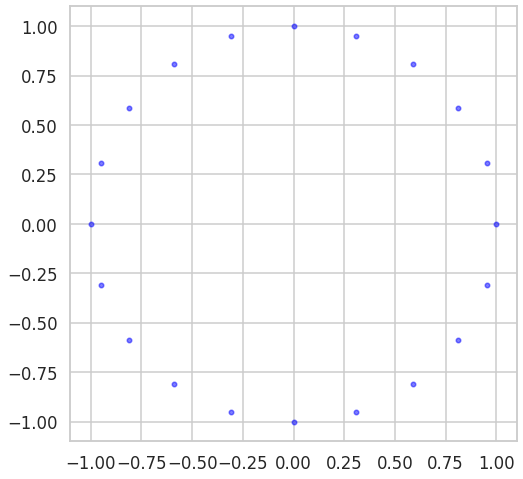

In [ ]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

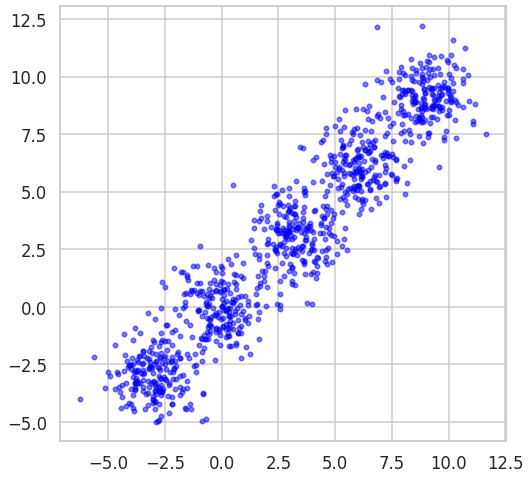

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

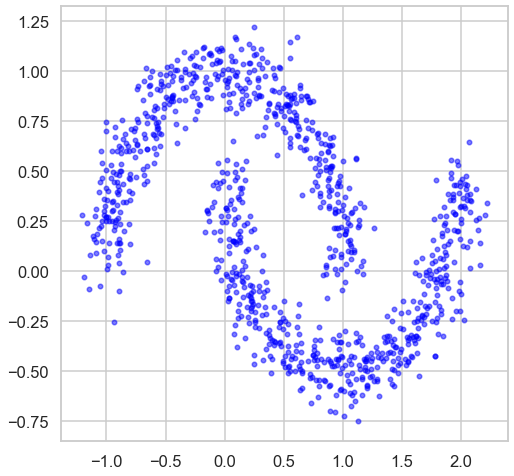

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

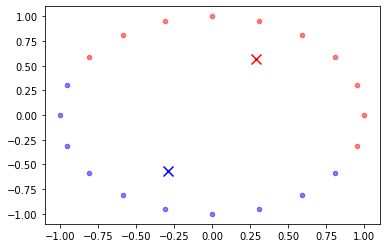

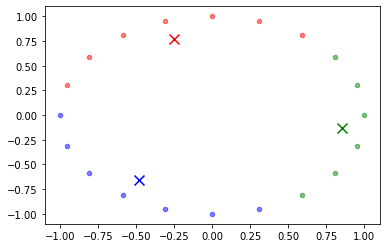

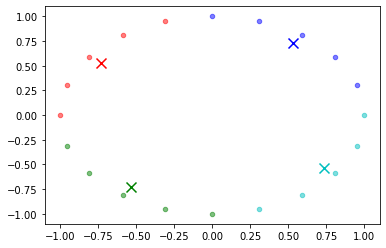

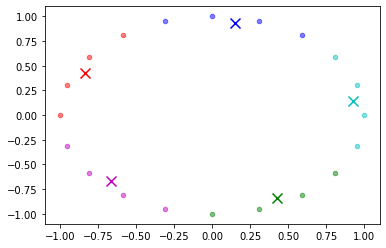

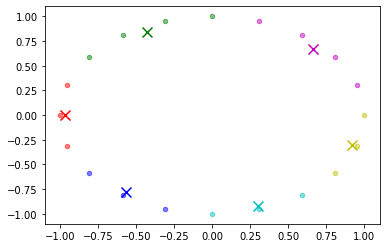

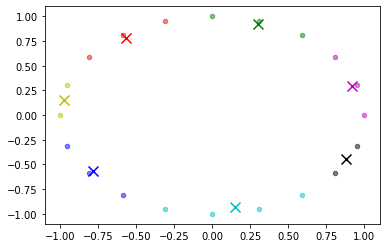

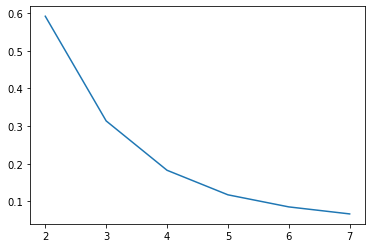

In [ ]:
#Ex1,ecludian
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4 or no point




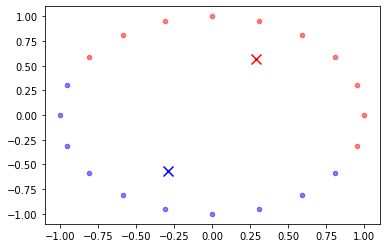

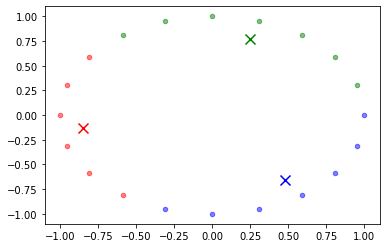

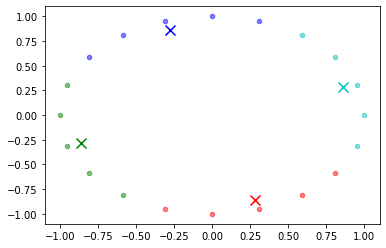

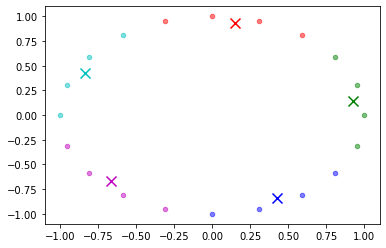

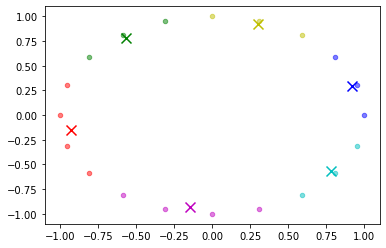

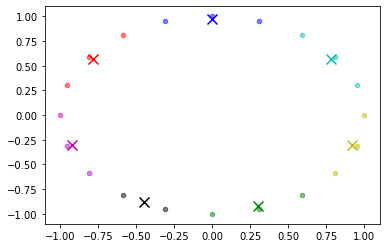

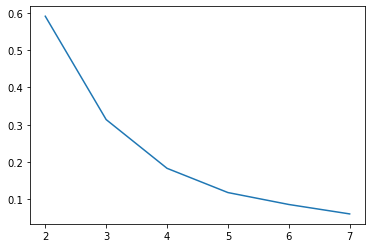

In [ ]:
#Ex1,ecludian,kmeans2
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4 or no point

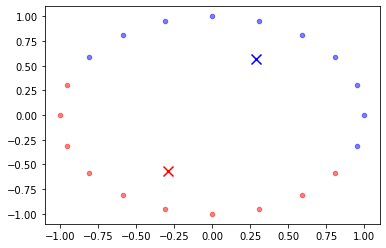

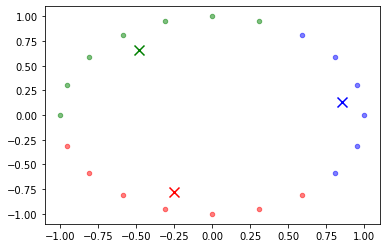

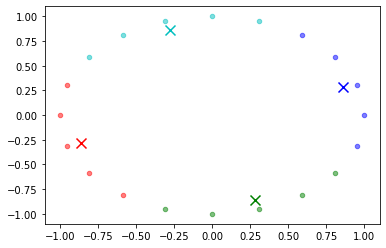

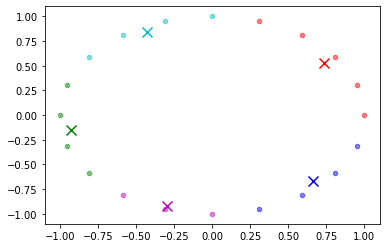

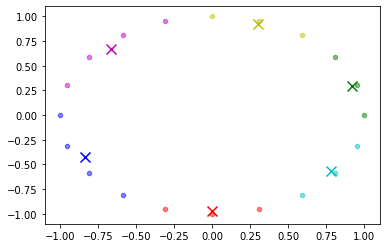

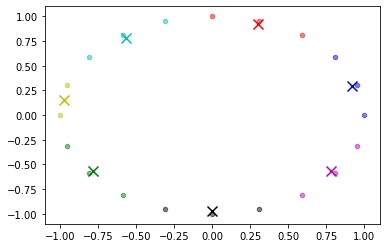

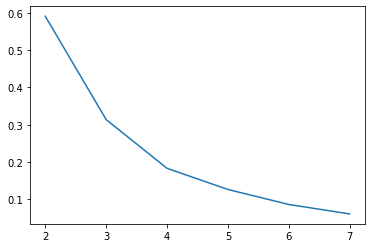

In [41]:
#Ex1,ecludian,kmeans2
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean5(X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4 or no point

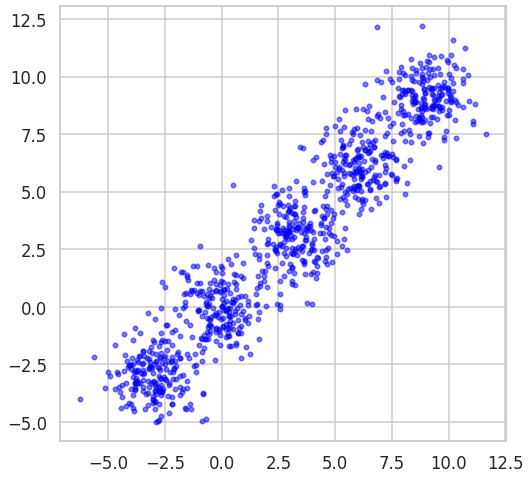

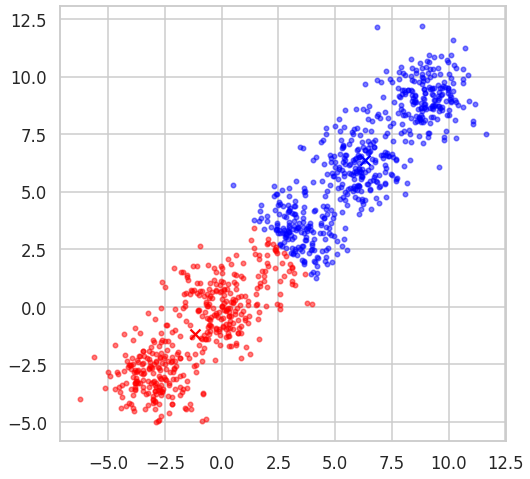

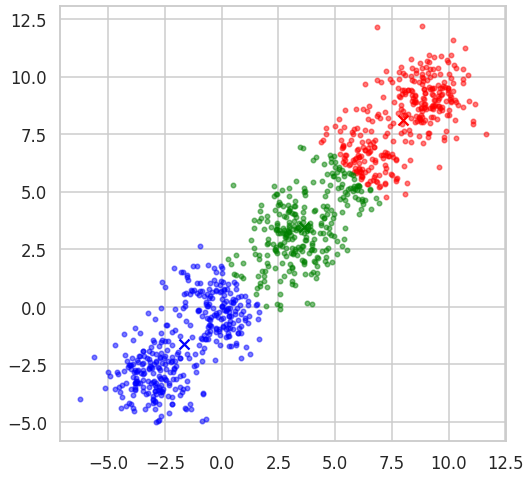

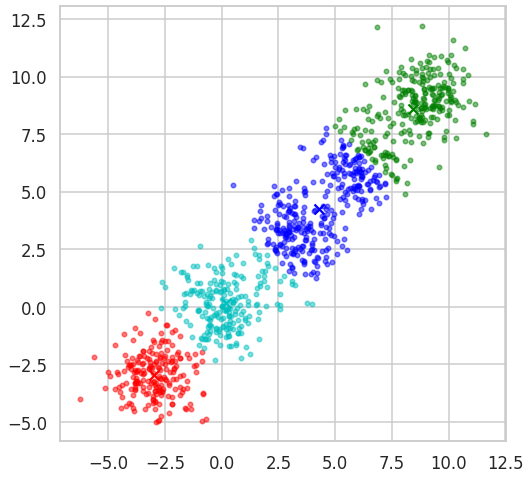

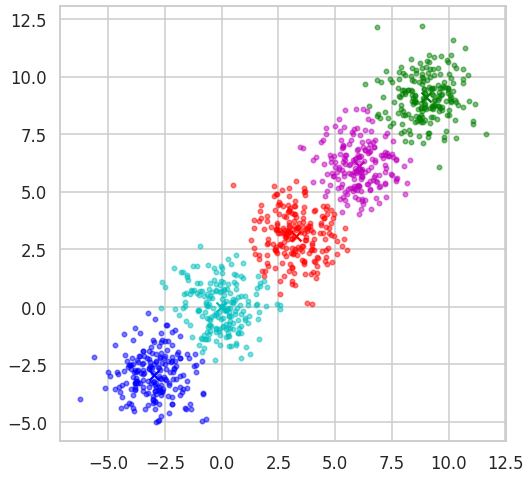

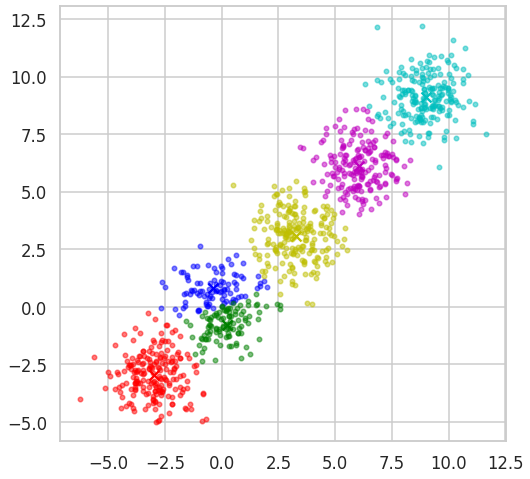

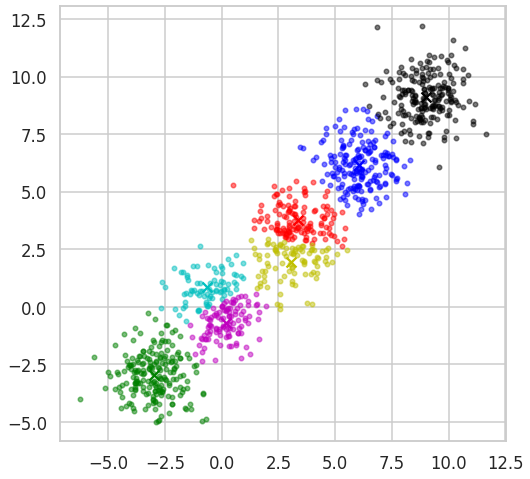

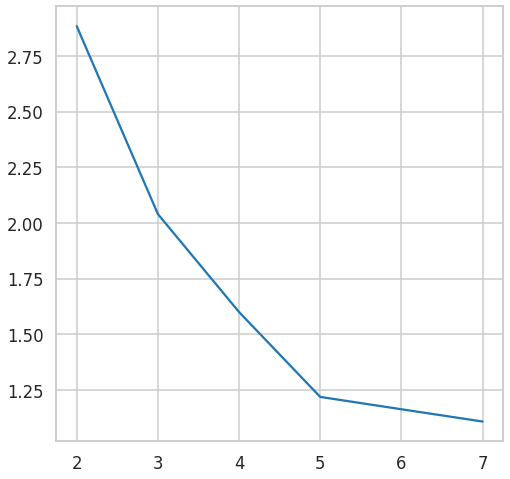

In [ ]:
#Ex2,ecludian
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 5

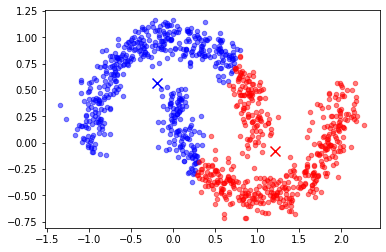

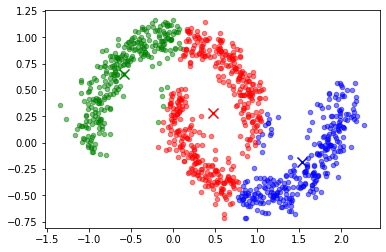

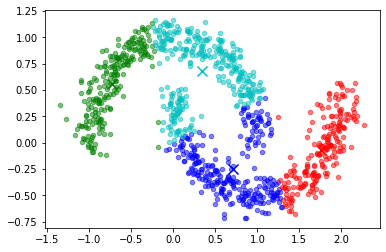

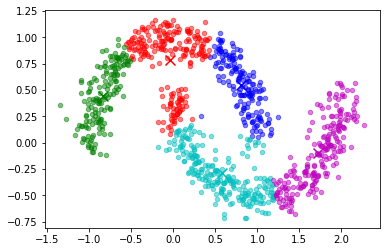

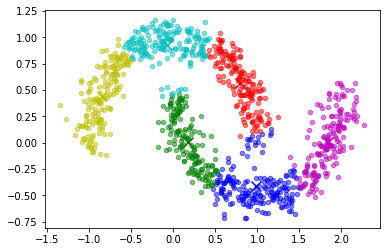

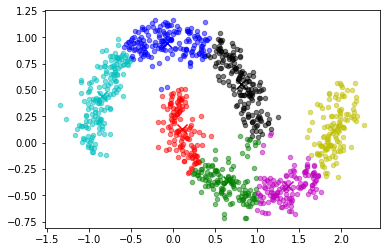

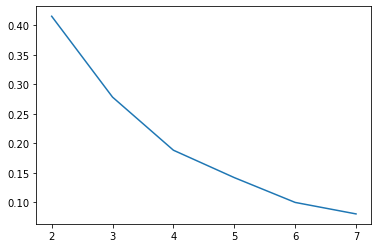

In [ ]:
#EX3,ecludian
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean (X,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#no elbow point 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
data=pd.read_csv("/content/Customerdata.csv")
data.head()


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
del data['ID']
data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

['Sex', 'Marital status']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


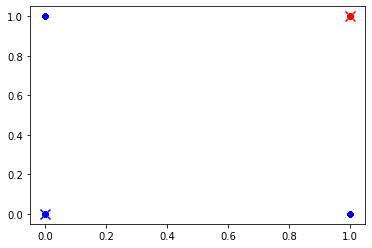

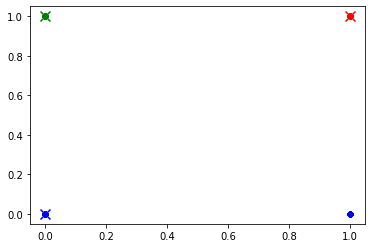

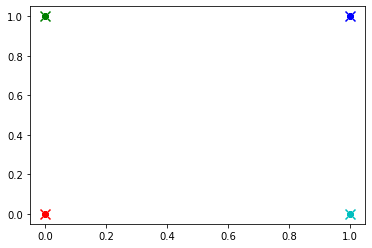

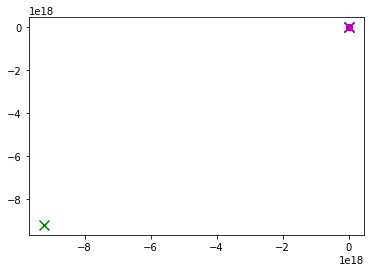

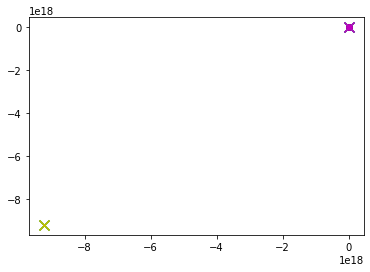

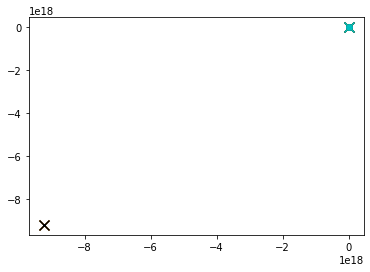

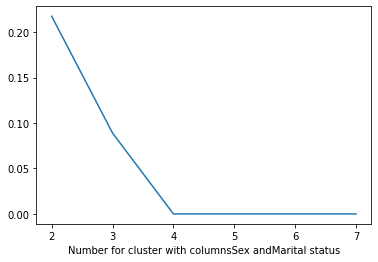

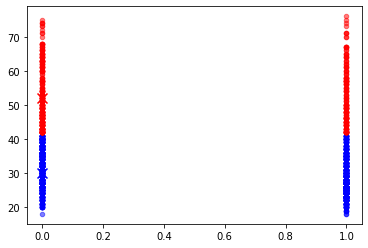

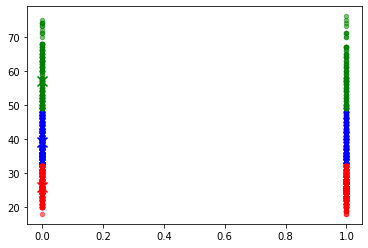

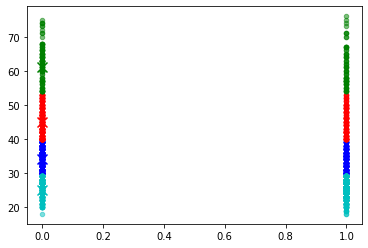

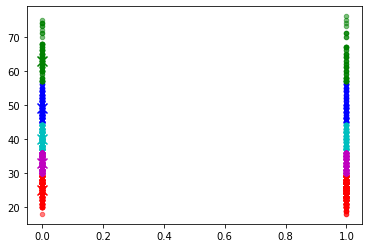

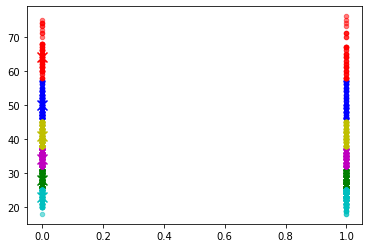

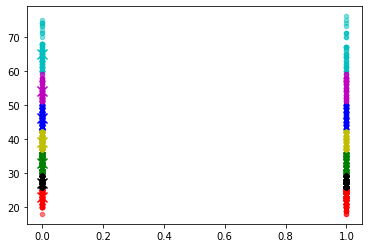

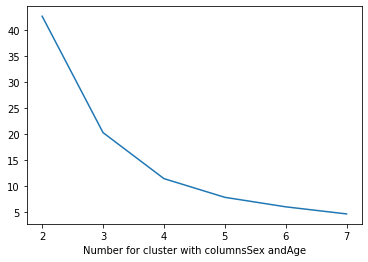

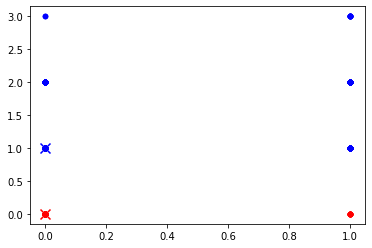

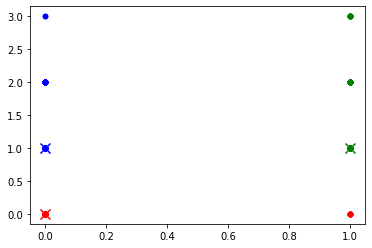

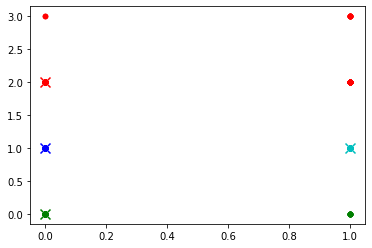

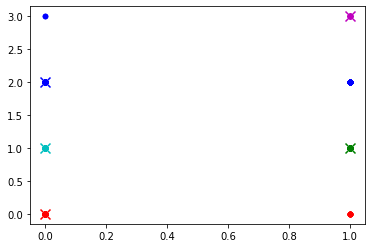

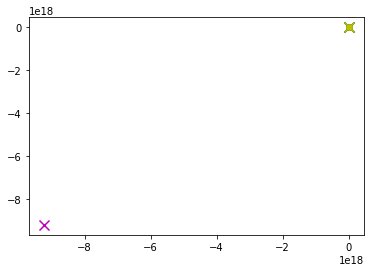

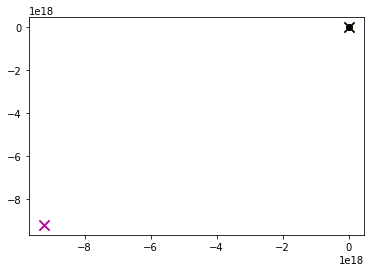

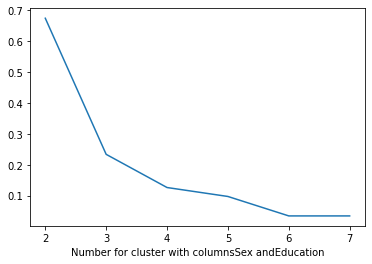

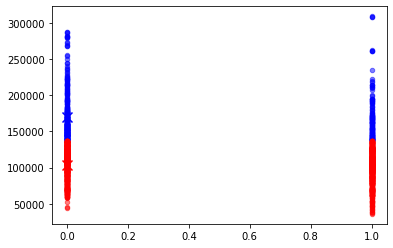

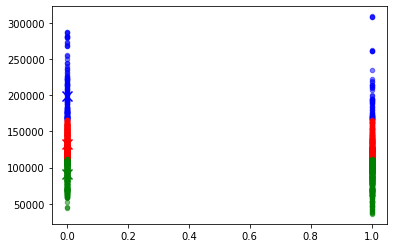

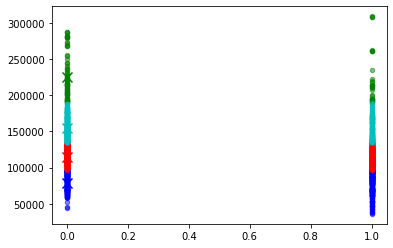

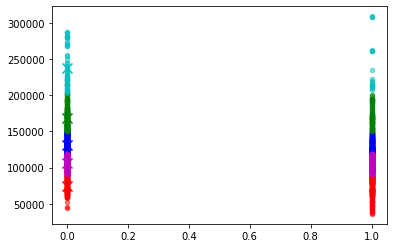

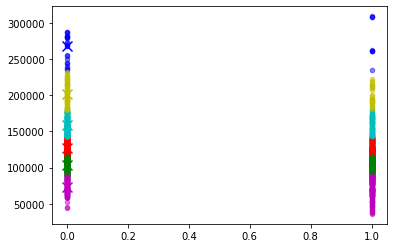

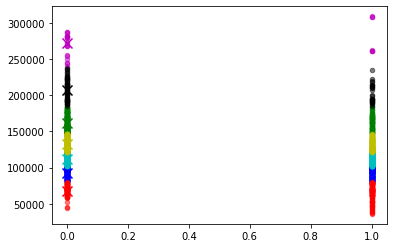

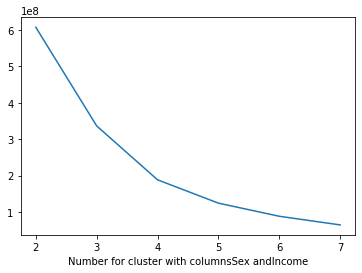

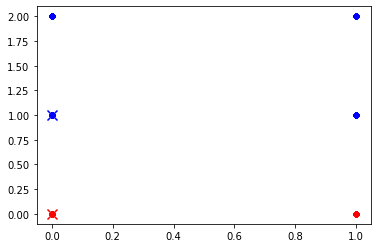

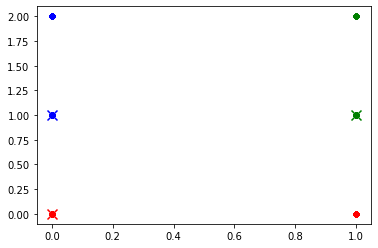

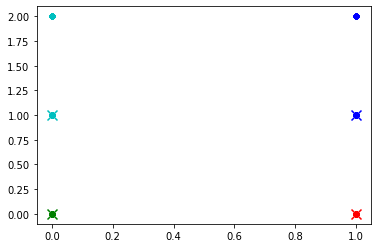

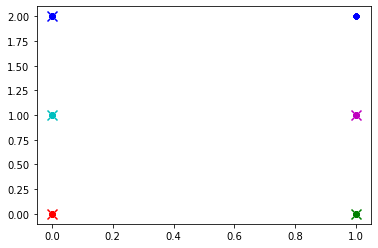

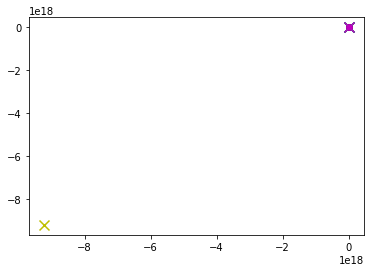

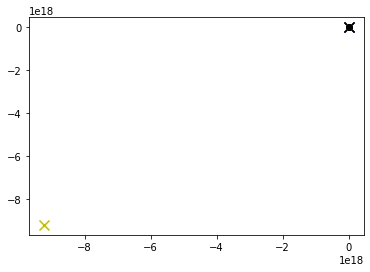

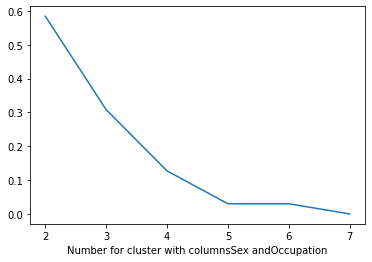

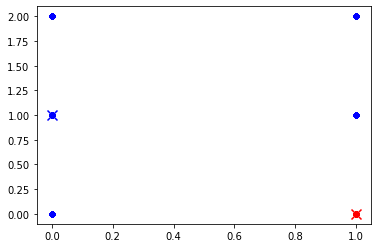

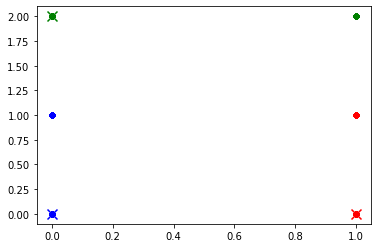

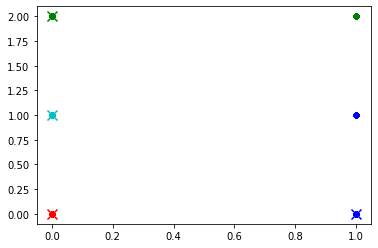

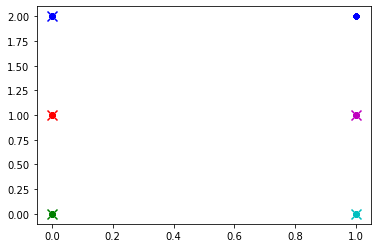

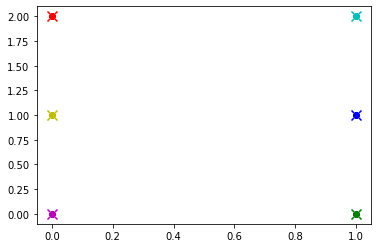

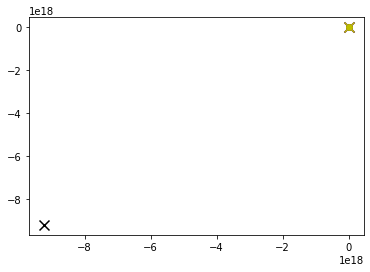

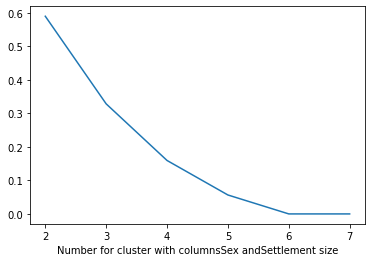

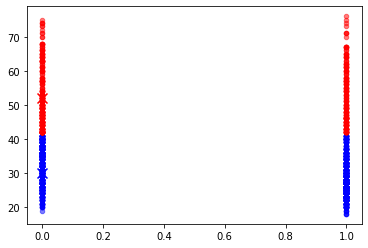

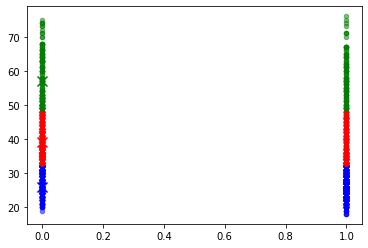

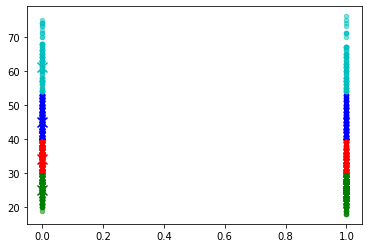

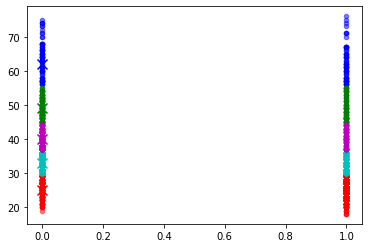

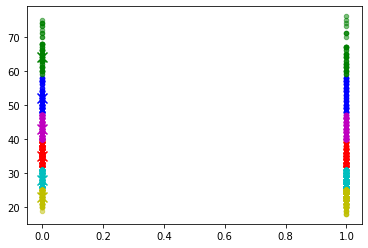

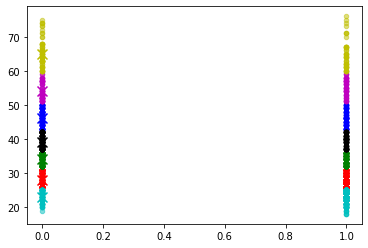

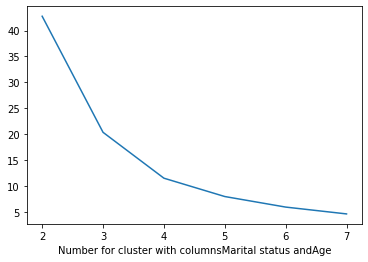

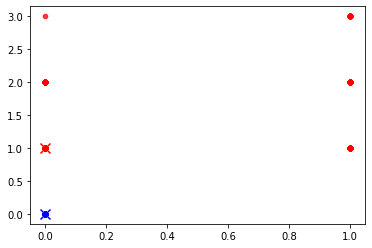

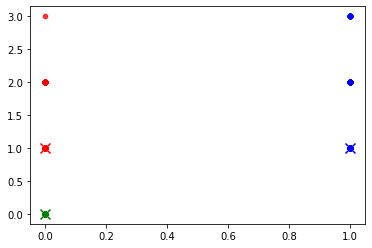

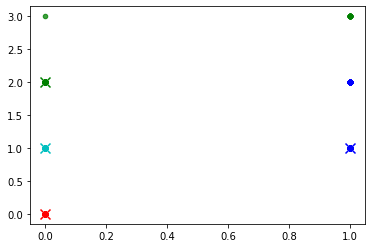

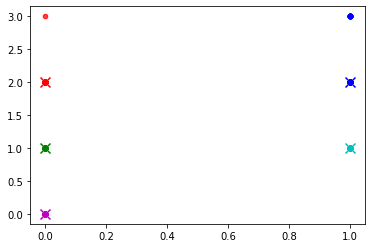

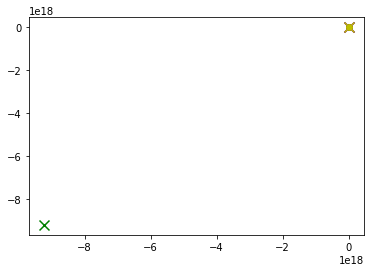

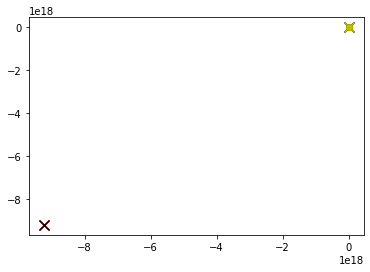

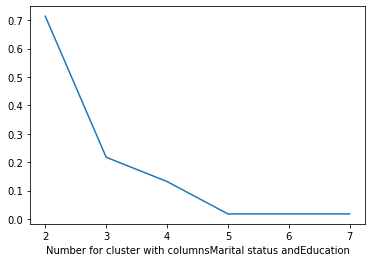

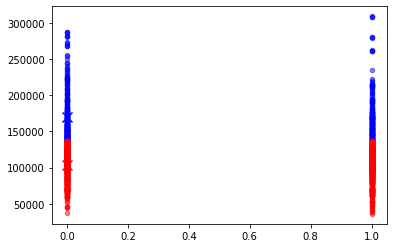

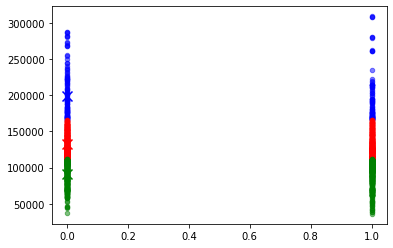

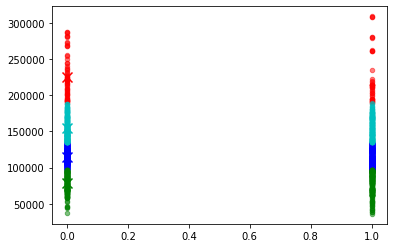

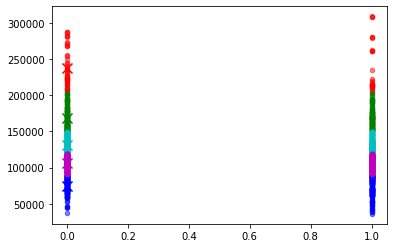

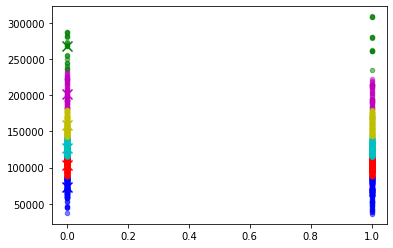

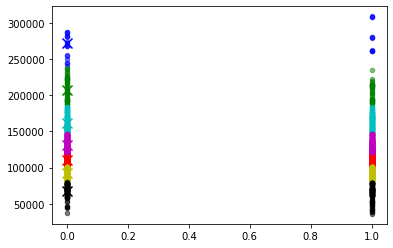

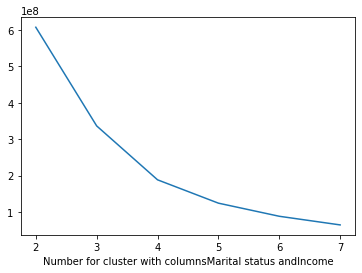

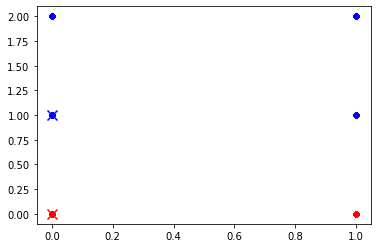

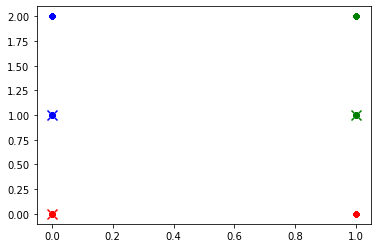

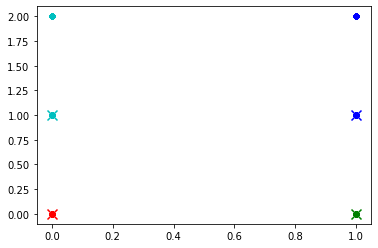

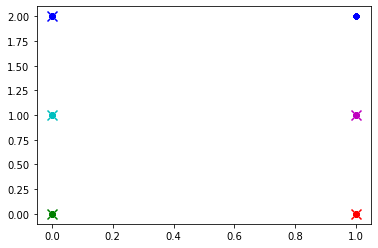

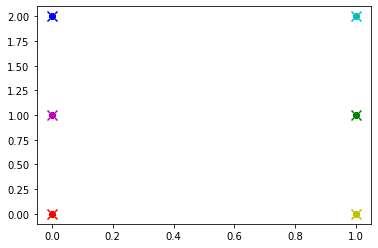

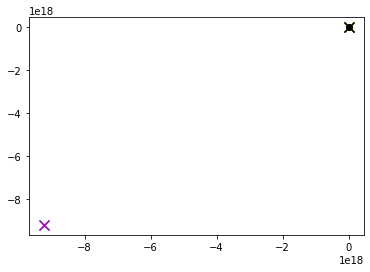

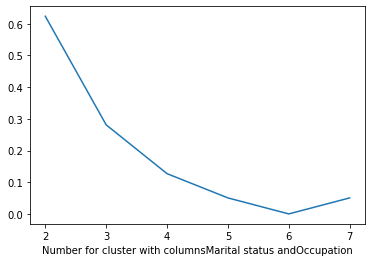

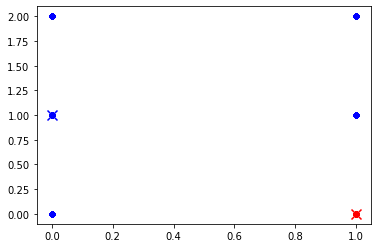

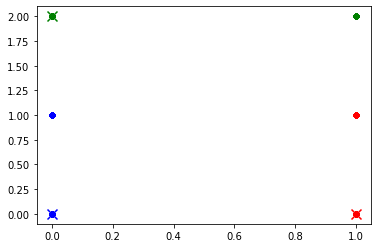

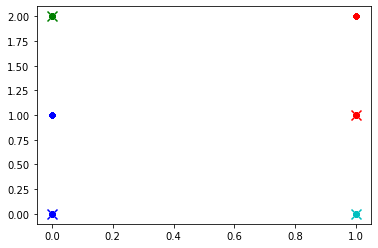

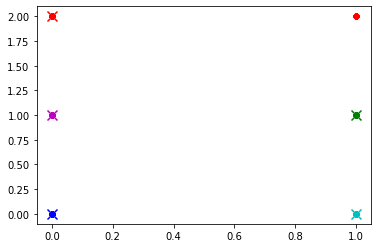

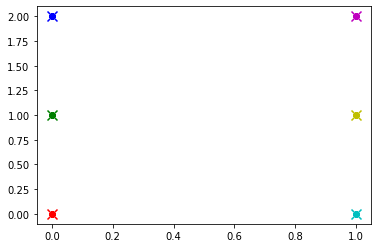

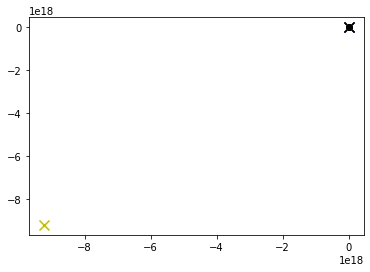

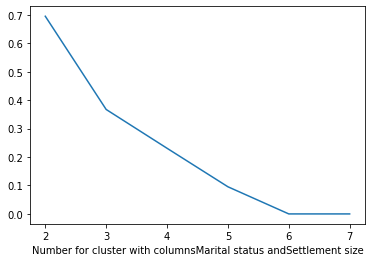

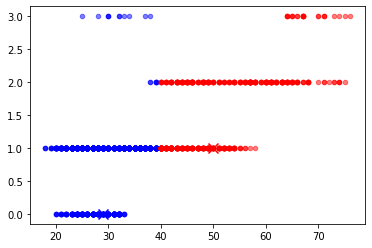

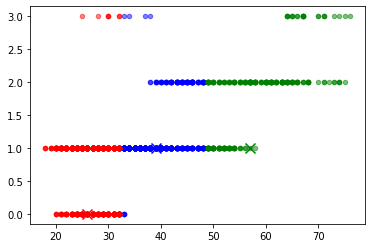

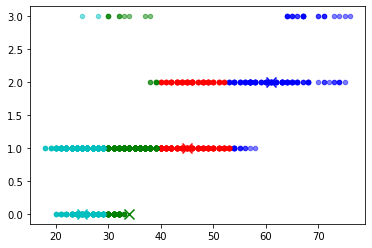

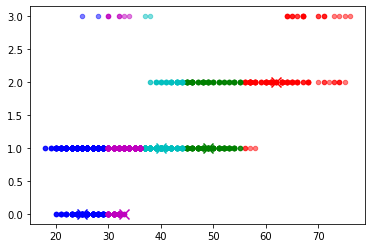

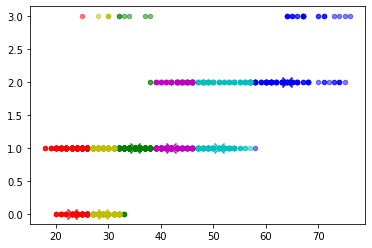

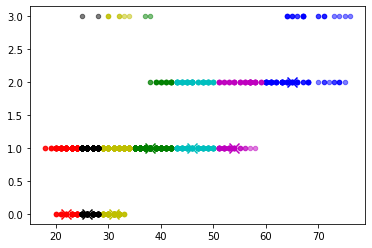

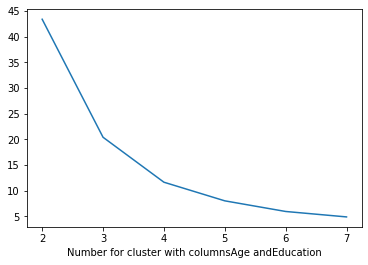

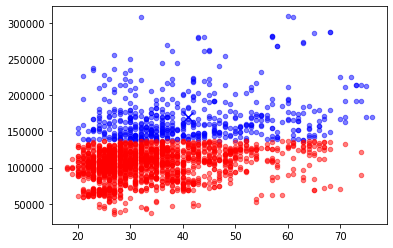

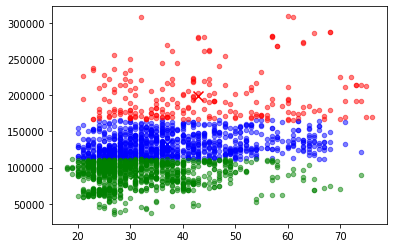

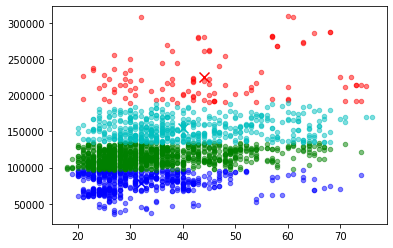

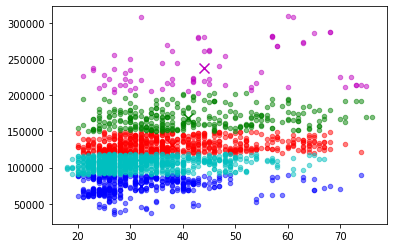

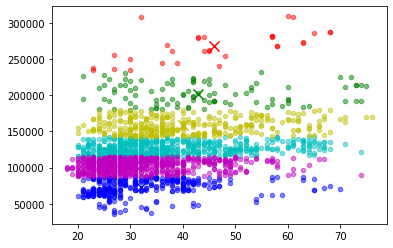

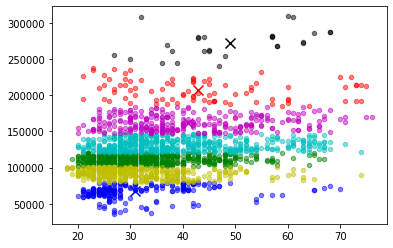

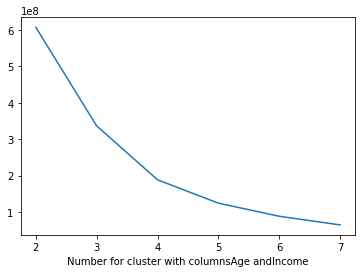

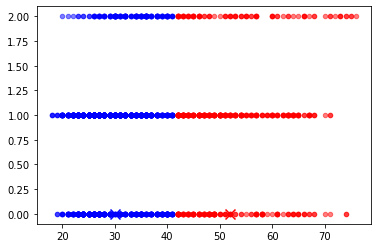

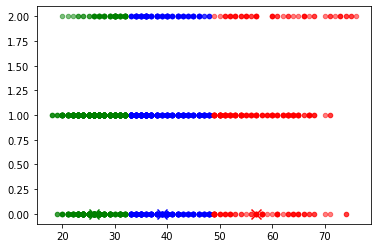

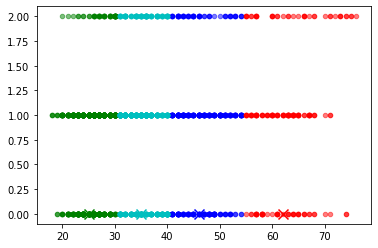

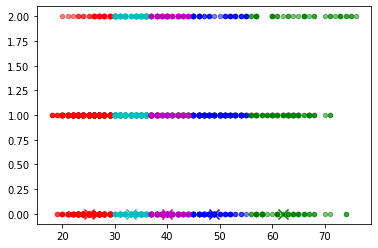

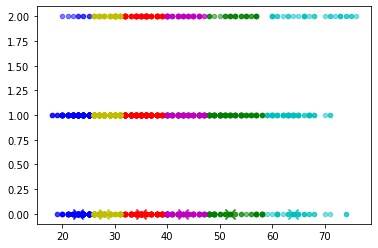

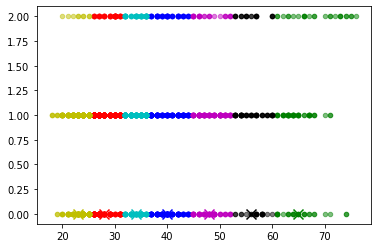

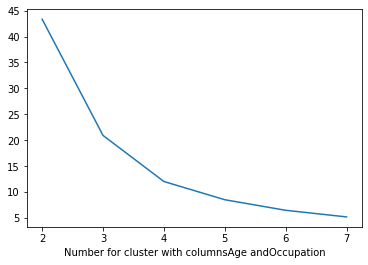

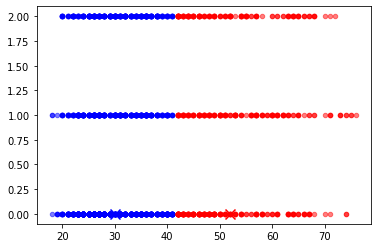

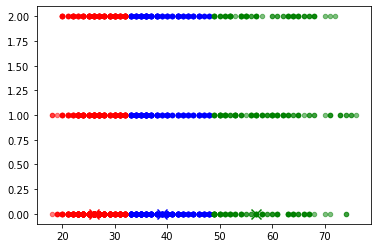

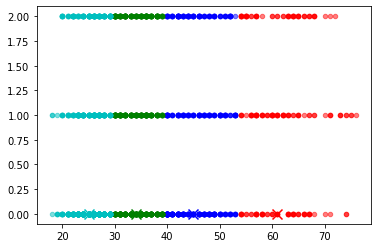

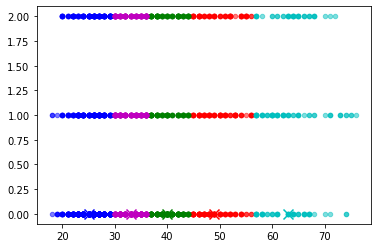

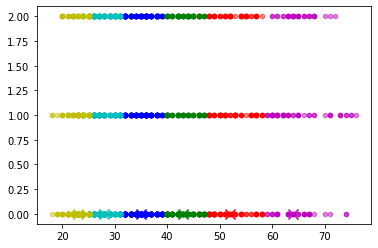

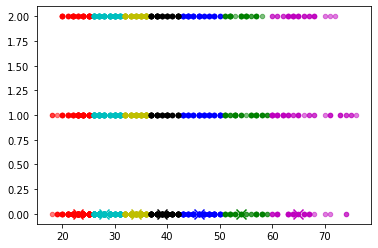

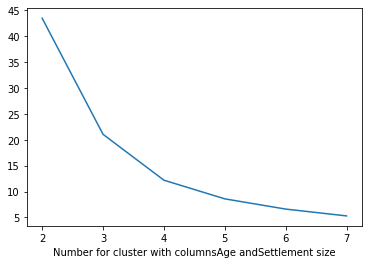

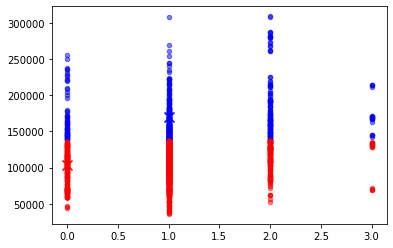

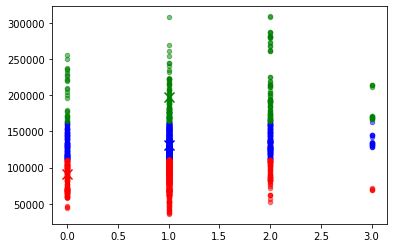

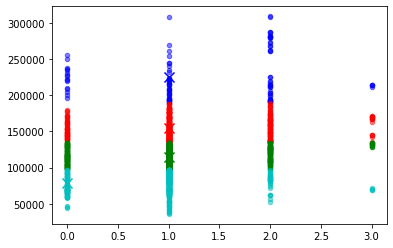

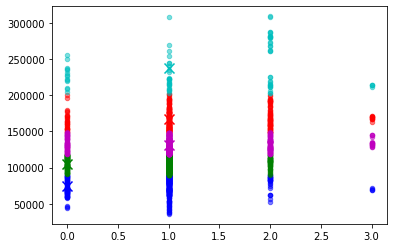

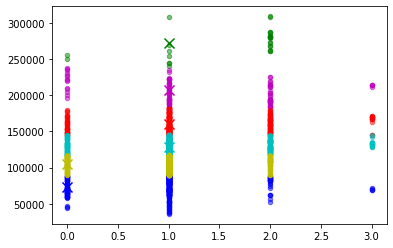

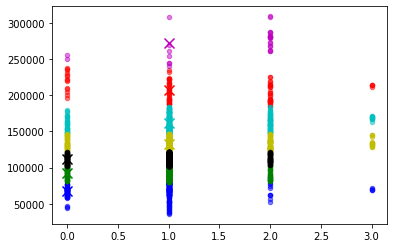

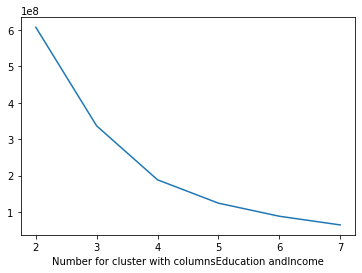

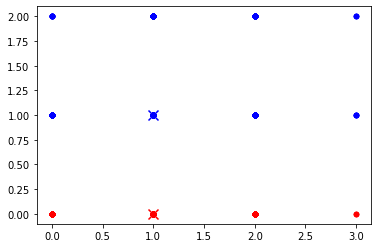

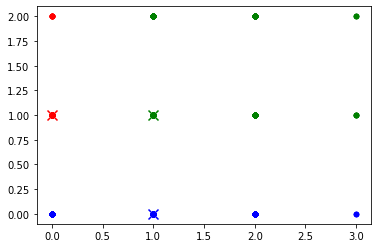

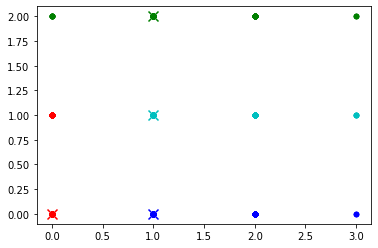

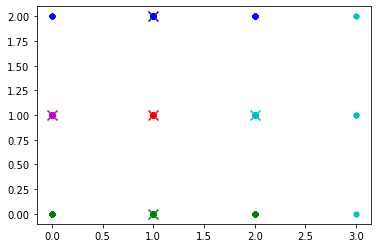

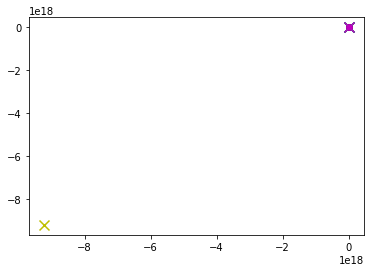

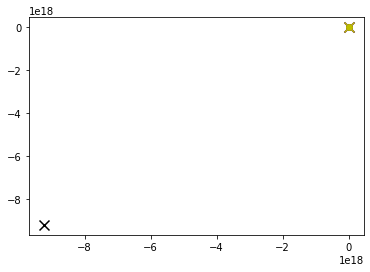

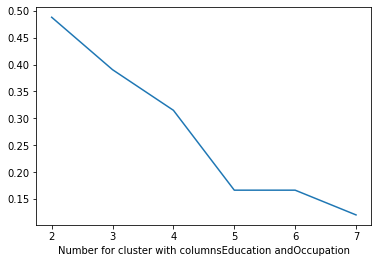

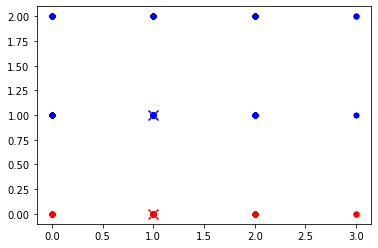

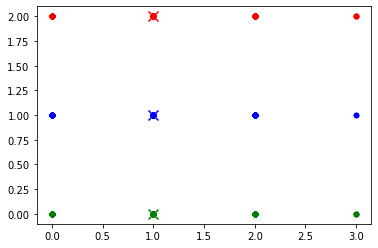

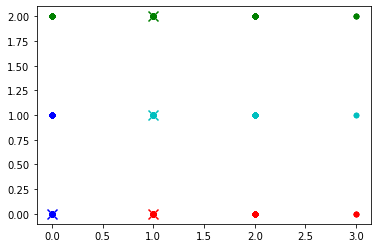

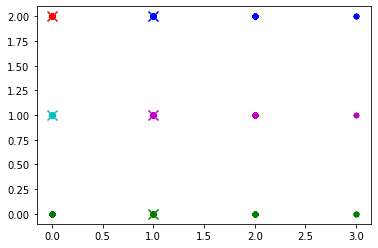

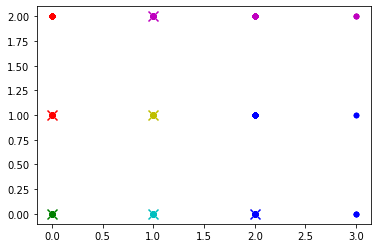

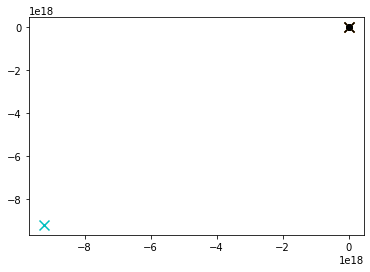

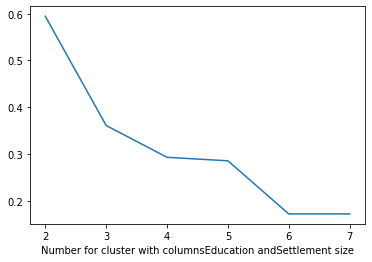

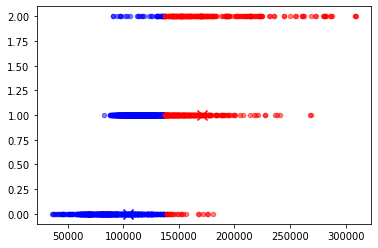

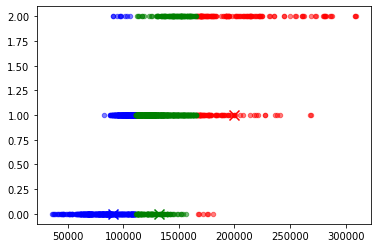

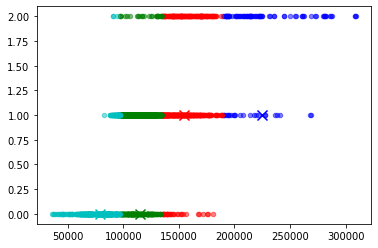

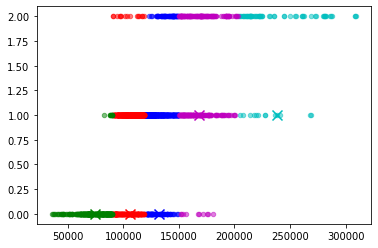

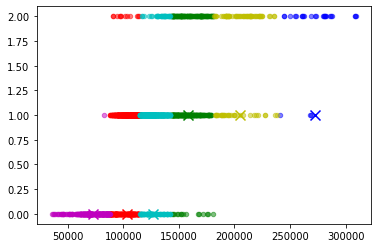

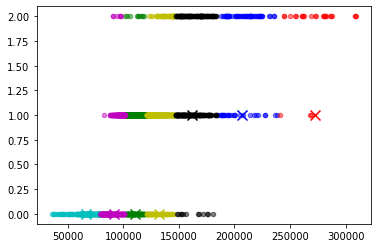

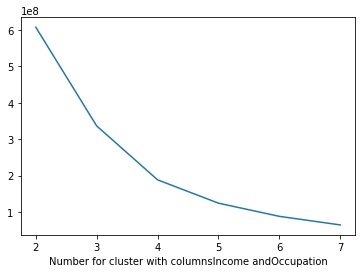

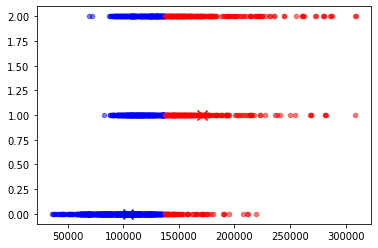

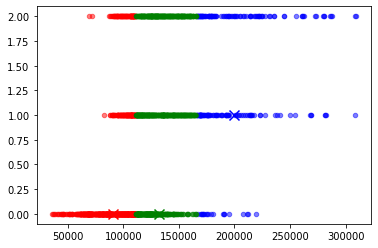

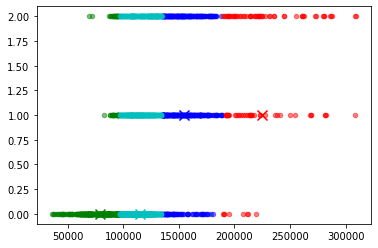

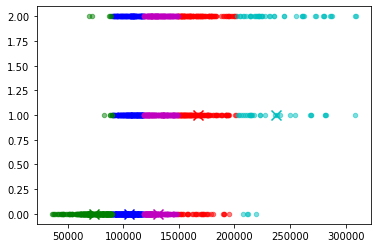

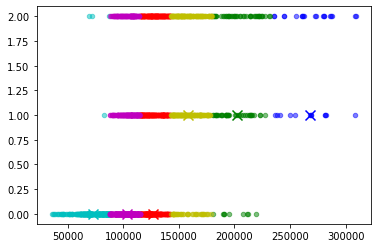

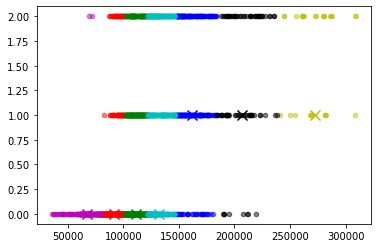

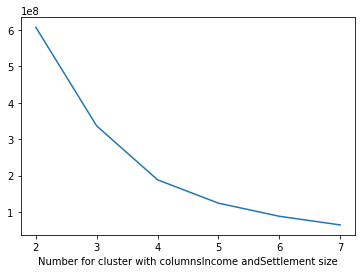

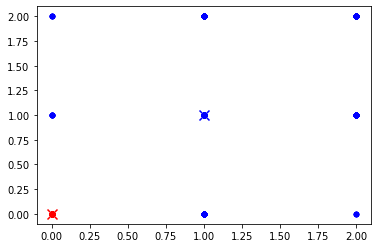

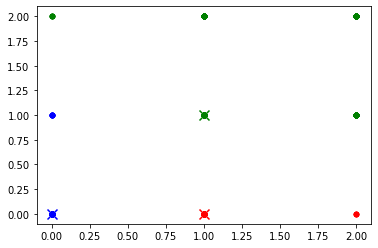

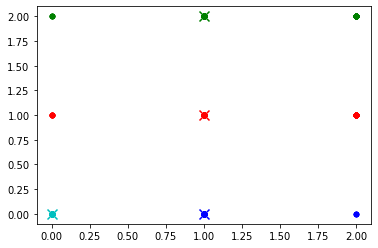

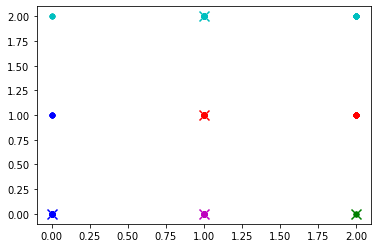

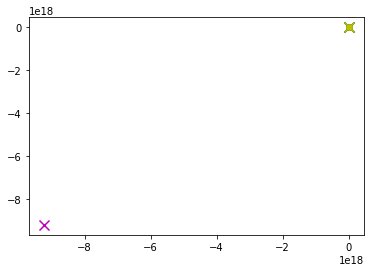

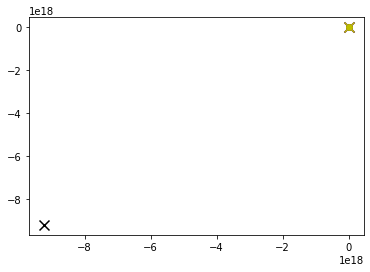

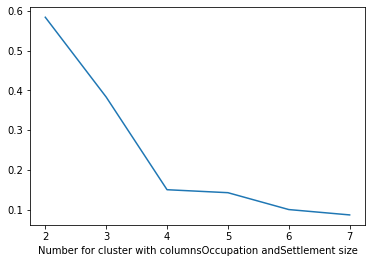

In [ ]:
#data columns ,ecludian,before normalization
import itertools as it
data1=list(it.combinations(data, 2))
print(list(data1[0]))
for i in data1:
    
    df=data[list(i)]
    
    k=[2,3,4,5,6,7]
    dist=[]

    for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(df.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(df.values,labels,centers,z)
     dist.append(mindisto)
    plt.figure() 
    strx=str("Number for cluster"+" "+"with columns"+i[0]+" and"+i[1])
    plt.xlabel(strx)
    plt.plot(k,dist)
#sex,marital status elbow point 4
#sex,age elbow point 4
#sex,education elbow point 6
#sex,income elbow point 4
#sex,occupation elbow point 5
#sex,settlement size elbow point 6
#marital status,age elbow point 4 or no ebow point
#marital status,education elbow point 5 
#marital status,income elbow point 4 or no elbow point
#marital status,occcupation no elbow point 
#marital status,settlement size elbow point 6
#age,education elbow point 4 or no elbow point
#age,income elbow point 4 or no elbow point
#age,occupation elbow point 4 or no elbow point
#age,settlement size elbow point 4 or no elbow point
#education,income elbow point 4 or no elbow point
#education,occupation elbow point 6 or no elbow point
#education,settlement size elbow point 6 
#income,occupation elbow point 4 or no elbow point
#income,settlement size elbow point 4 or no elbow point
#occupation,settlement size elbow point 4 or no elbow point









     

    


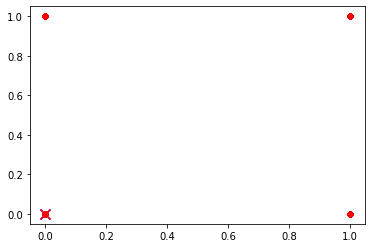

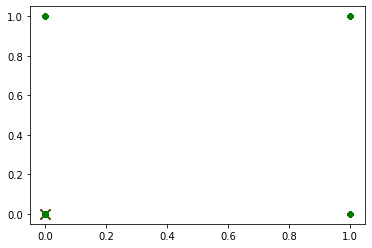

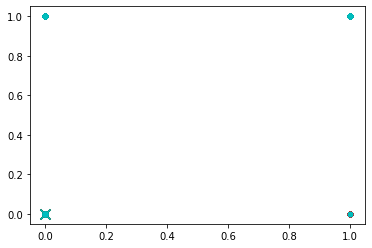

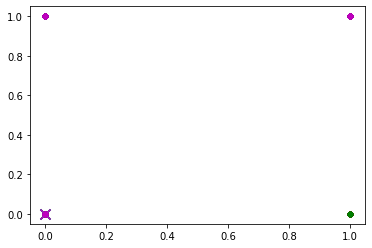

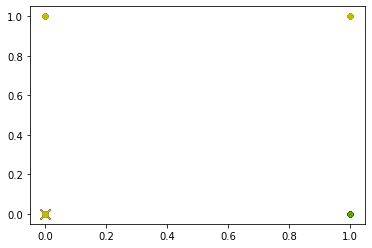

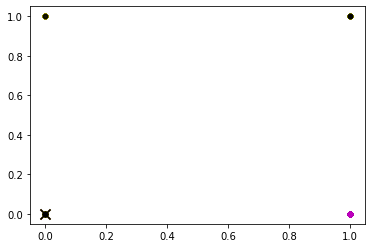

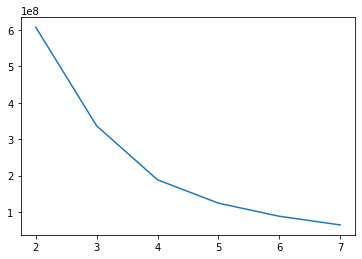

In [ ]:

k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
     labels,centers,df1,mindisto=GUC_Kmean(data.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)
#elbow point 4 
    

[[ 3.71558426e+03  3.07147829e+01]
 [ 2.98185794e+04 -1.70369432e+01]
 [-3.17444175e+04  1.64208040e+01]
 ...
 [-3.45544193e+04 -1.30665084e+00]
 [-2.29864201e+04 -9.49458301e+00]
 [-5.25384199e+04 -5.41988332e+00]]


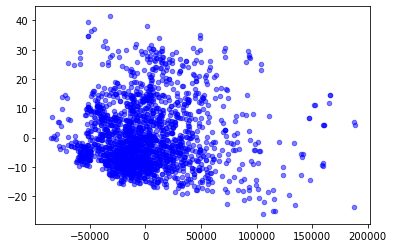

In [ ]:
pca = PCA(2)

df = pca.fit_transform(data)
print(df)
display_cluster(df)


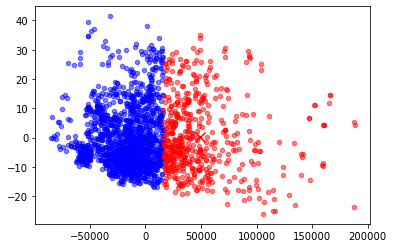

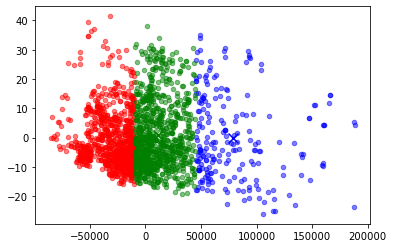

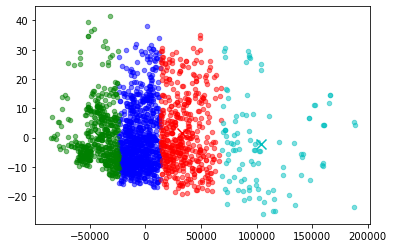

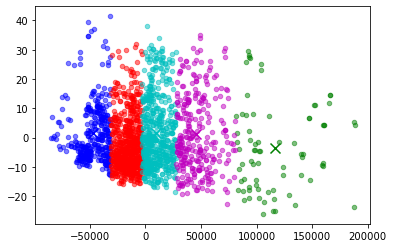

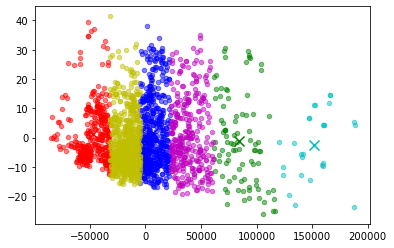

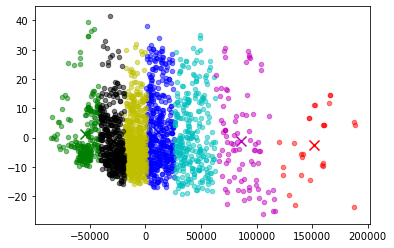

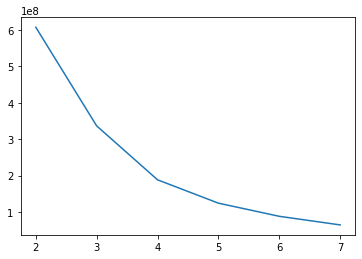

In [ ]:
#data,ecludian,pca
k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
 labels,centers,df1,mindisto=GUC_Kmean(df,z, "Ecluidian_distance")
 plt.figure() 
 display_cluster(df,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow is 4

In [ ]:
#normalizing age and income
from sklearn.preprocessing import MinMaxScaler
x1=pd.DataFrame(data[['Income', 'Age']])
scaler = MinMaxScaler()
#print(x1.head())
scaler.fit(x1)
X_scaled1 = scaler.transform(x1)
X_scaled1 = pd.DataFrame(X_scaled1, columns=["Income2","Age2"])
data["Income"]=X_scaled1["Income2"]
data["Age"]=X_scaled1["Age2"]
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  0.844828          2  0.324781           1   
1    1               1  0.068966          1  0.420210           1   
2    0               0  0.534483          1  0.195144           0   
3    0               0  0.465517          1  0.496223           1   
4    0               0  0.603448          1  0.413842           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

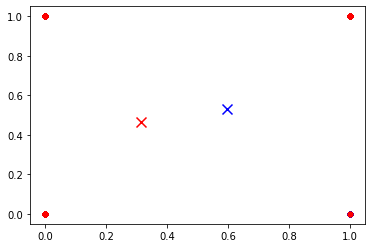

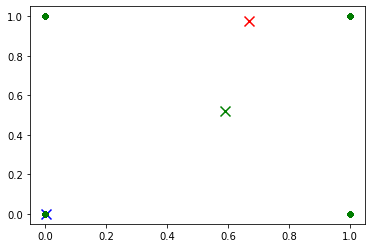

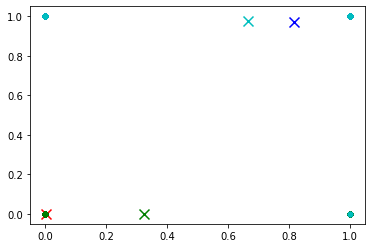

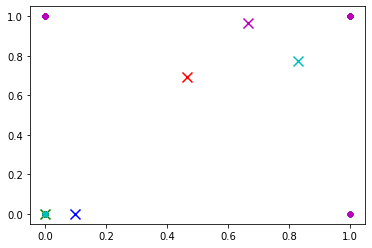

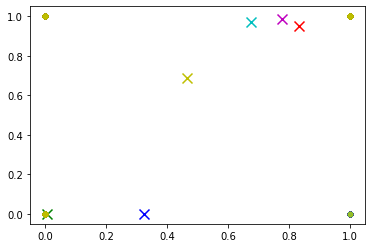

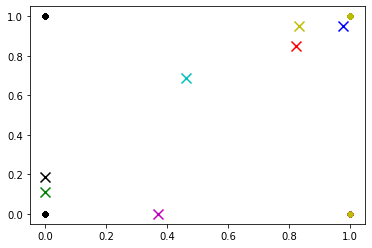

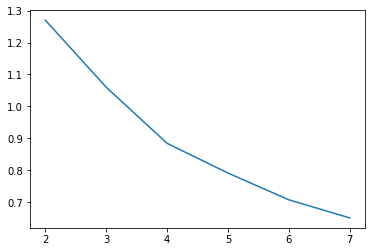

In [ ]:
#data after normalization

k=[2,3,4,5,6,7]
dist=[]

for z in k:
 #print(z)
     labels,centers,mindisto=GUC_Kmean2(data.values,z, "Ecluidian_distance")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)

#elbow point 4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


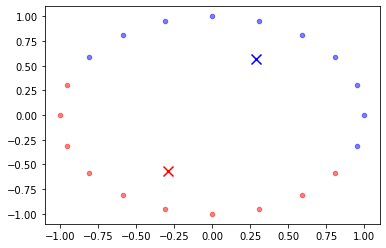

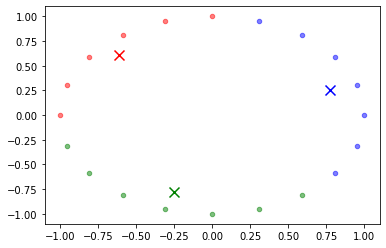

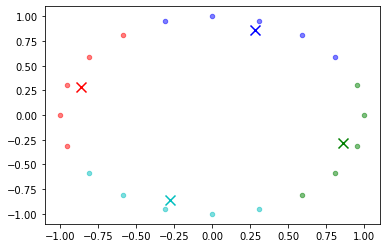

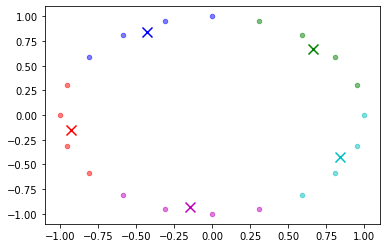

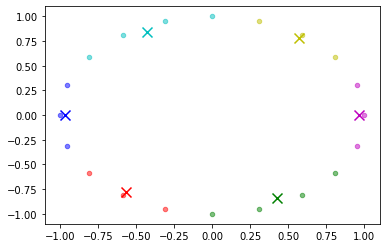

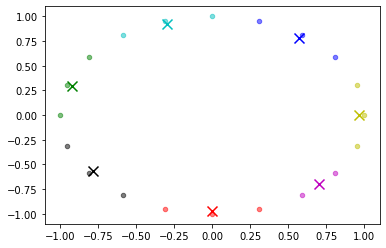

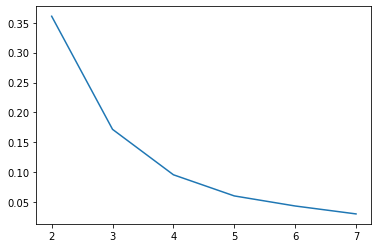

In [ ]:
#Ex1,pearsond
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

C:\Users\hp\AppData\Local\Temp/ipykernel_3728/4227908167.py:51: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)


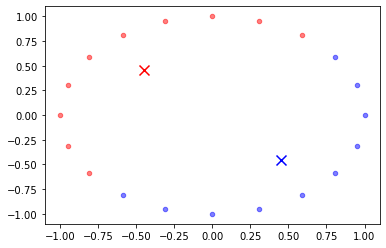

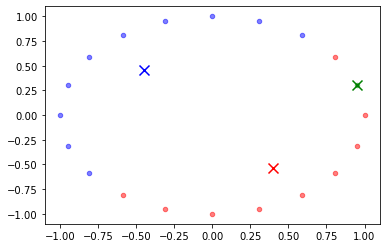

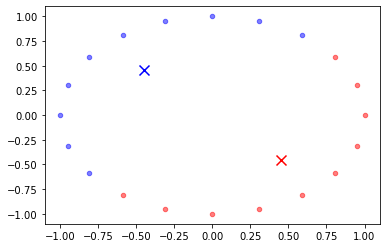

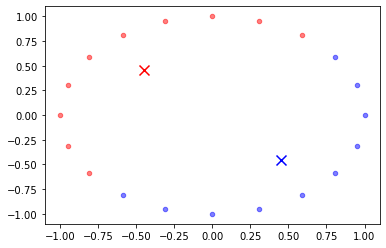

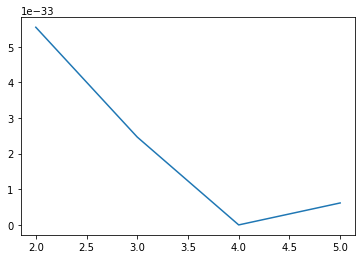

In [ ]:
#Ex1,pearson,run1
k=[2,3,4,5]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


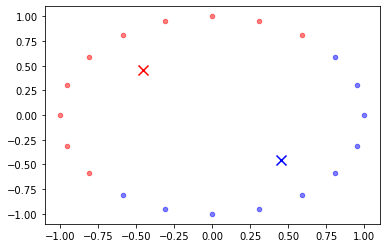

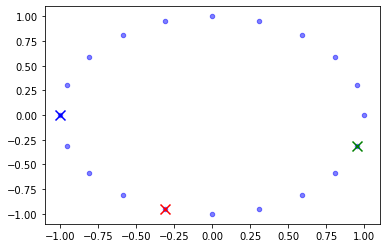

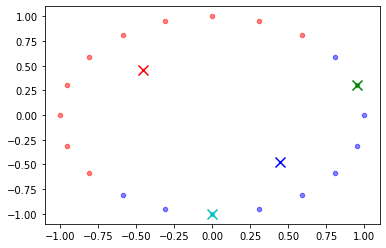

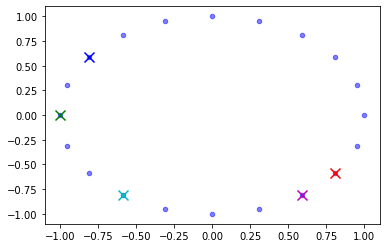

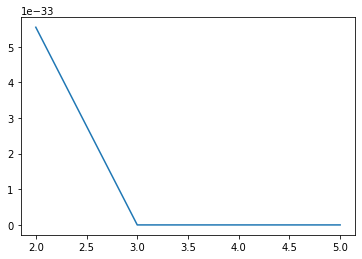

In [31]:
#Ex1,pearson,run1,kmeans5
k=[2,3,4,5]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean5(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


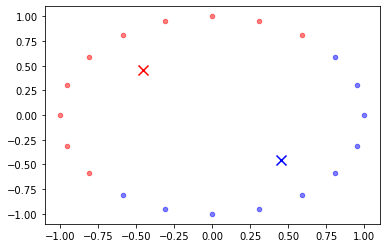

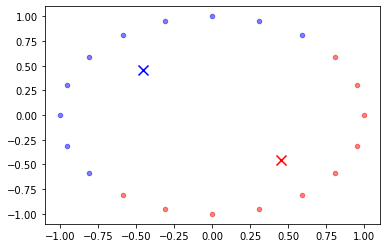

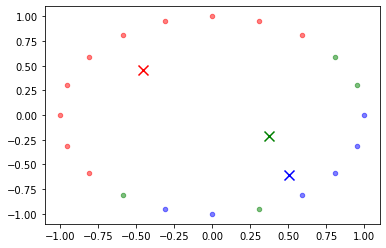

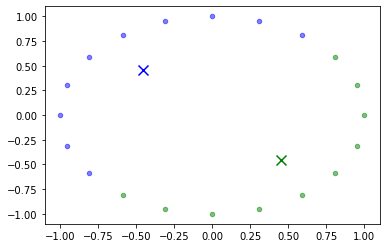

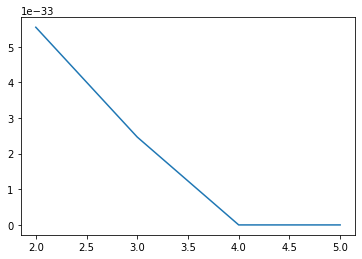

In [ ]:
#Ex1,pearson,run2
k=[2,3,4,5]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

C:\Users\hp\AppData\Local\Temp/ipykernel_3728/630129658.py:56: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)


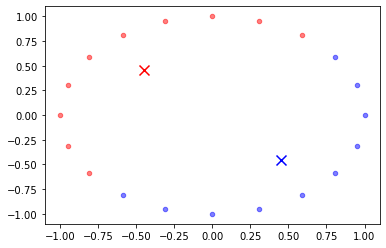

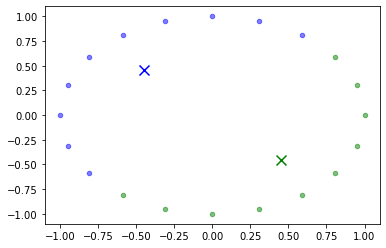

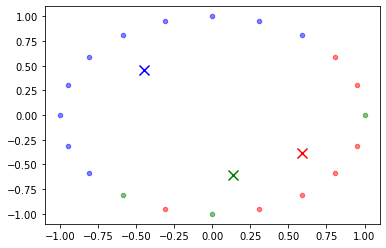

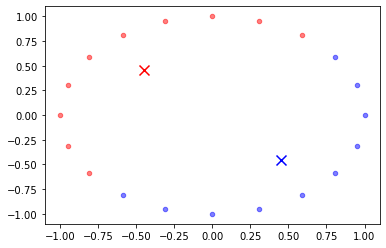

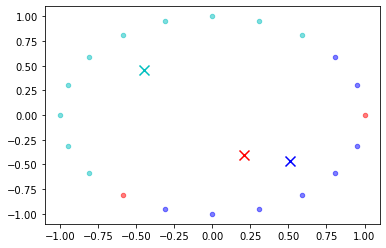

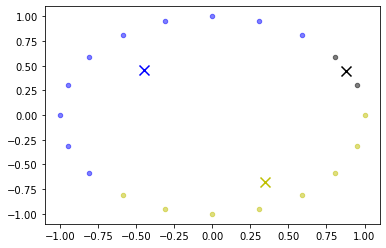

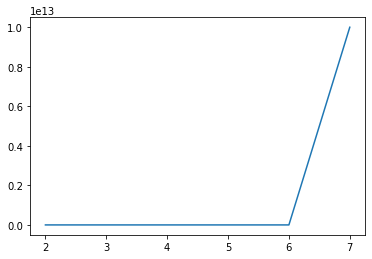

In [ ]:
#Ex1,pearson
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

C:\Users\hp\AppData\Local\Temp/ipykernel_10256/2344613648.py:47: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)


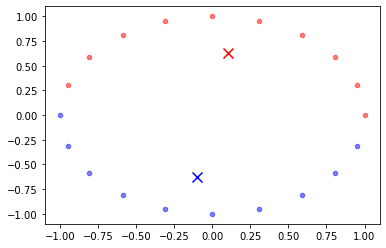

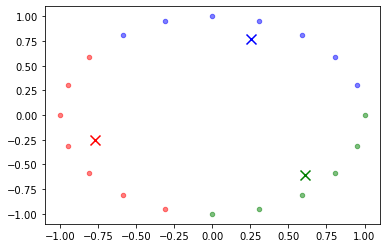

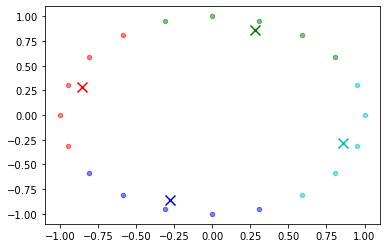

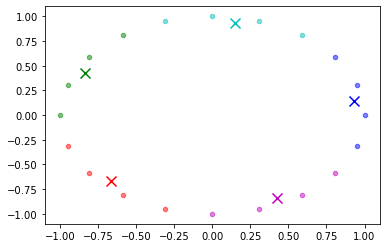

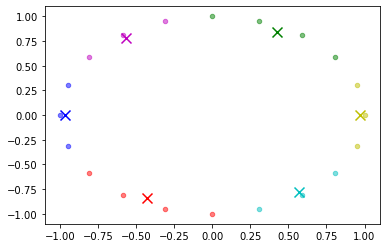

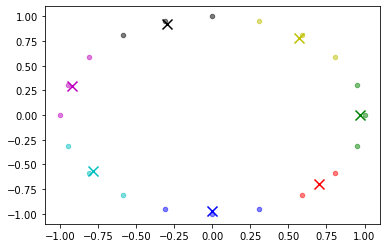

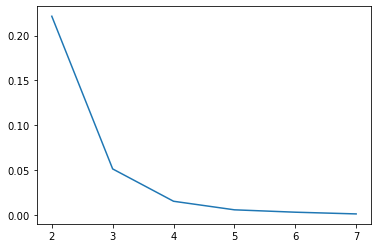

In [ ]:
#Ex1,pearsond,newkmeans
k=[2,3,4,5,6,7]
dist=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point is 4 or no elbow point

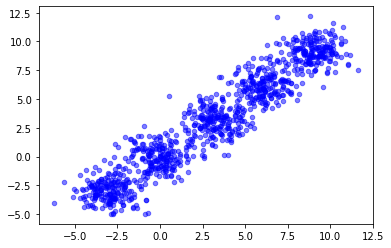

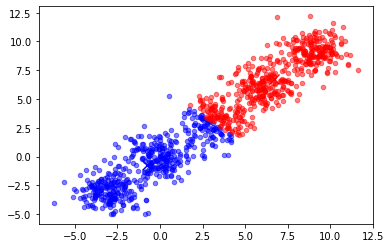

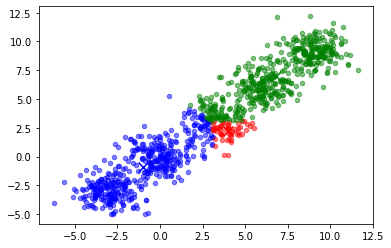

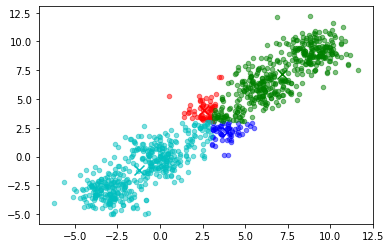

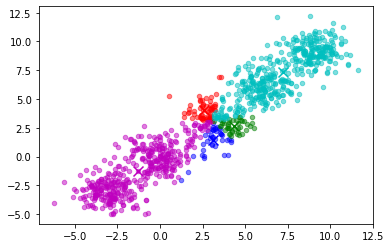

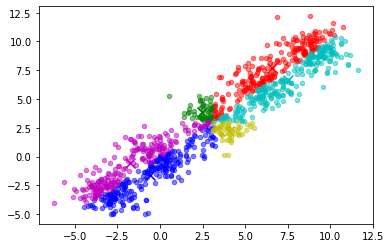

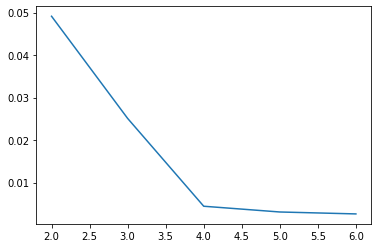

In [ ]:
#Ex2,pearsond
k=[2,3,4,5,6]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4

C:\Users\hp\AppData\Local\Temp/ipykernel_3728/4227908167.py:51: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


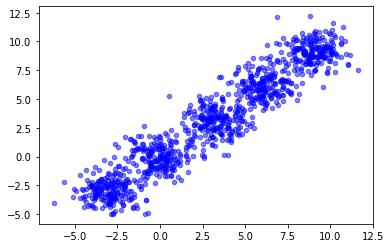

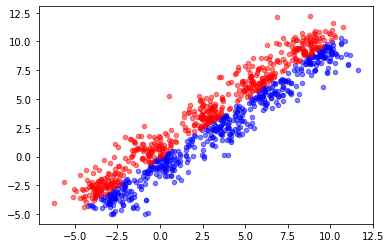

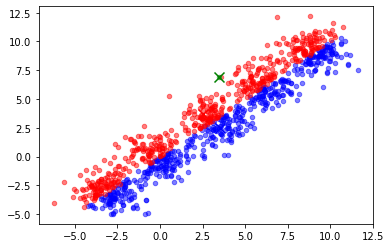

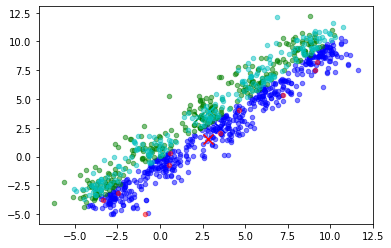

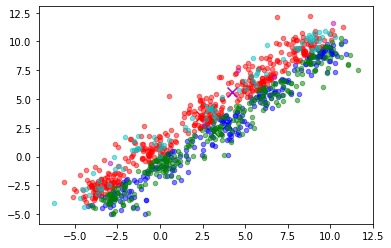

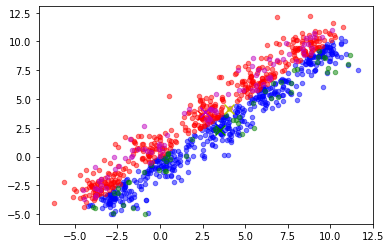

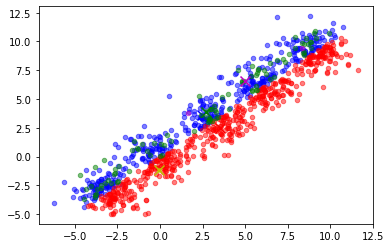

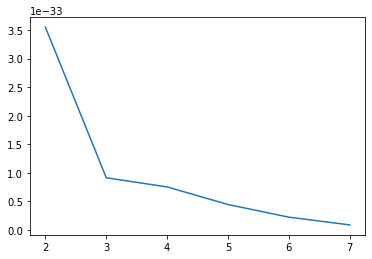

In [ ]:
#Ex2,pearsond,kmeans2
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


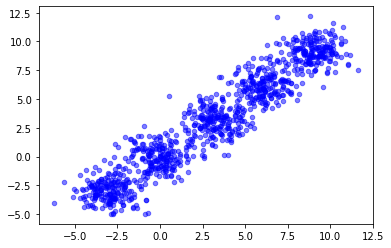

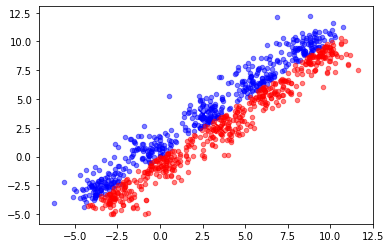

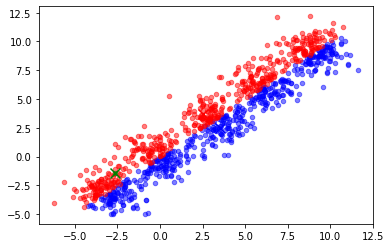

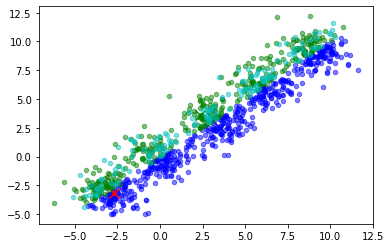

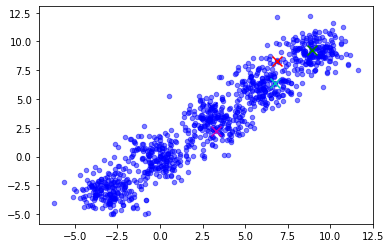

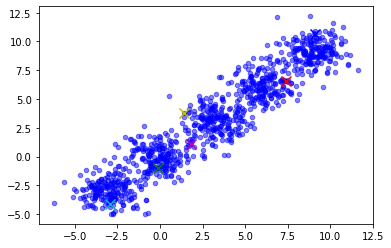

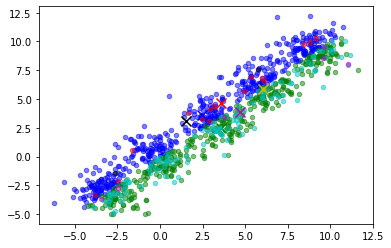

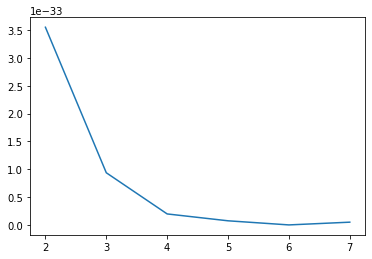

In [30]:
#Ex2,pearsond,kmeans5
k=[2,3,4,5,6,7]
dist=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean5(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3,4

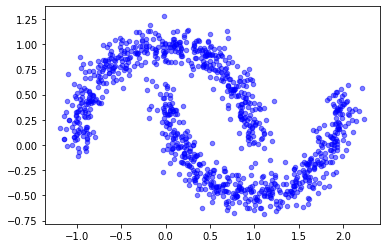

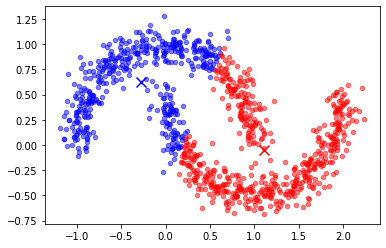

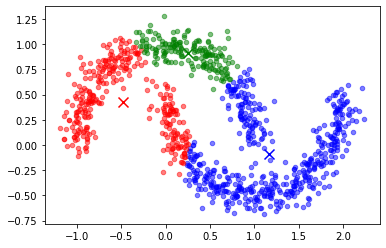

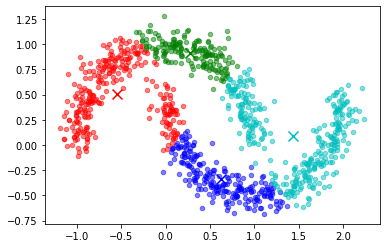

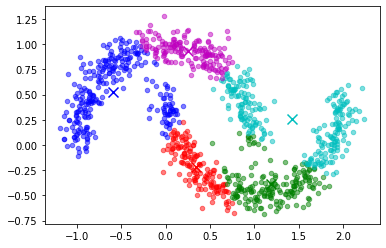

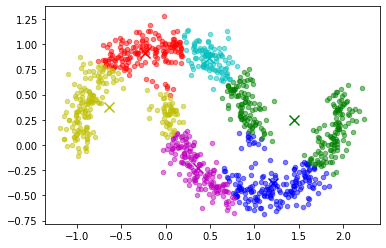

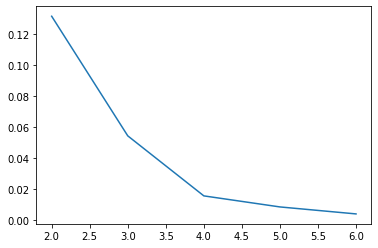

In [ ]:
#ex3,pearsond
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
k=[2,3,4,5,6]
dist=[]
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,df,mindisto=GUC_Kmean(X,z, "pearsond")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 4

C:\Users\hp\AppData\Local\Temp/ipykernel_3728/4227908167.py:51: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)


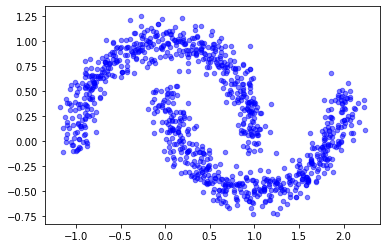

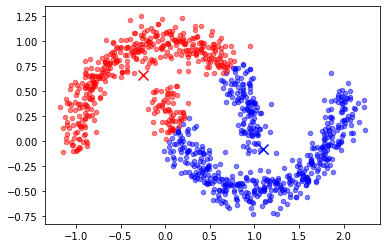

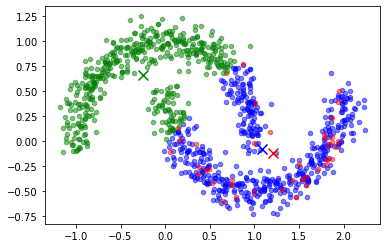

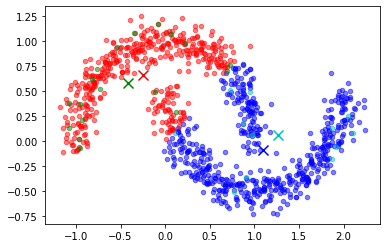

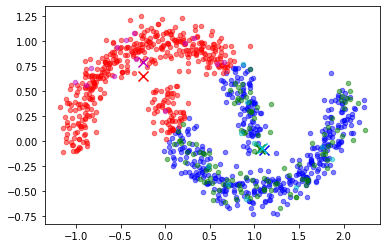

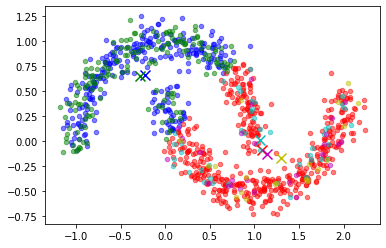

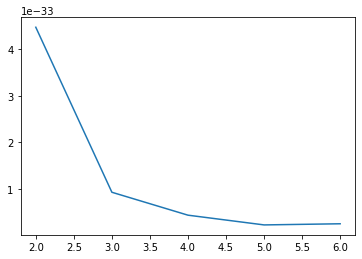

In [ ]:
#ex3,pearsond
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
k=[2,3,4,5,6]
dist=[]
display_cluster(X)
for z in k:
 #print(z)
 labels,centers,mindisto=GUC_Kmean2(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


4
5
6


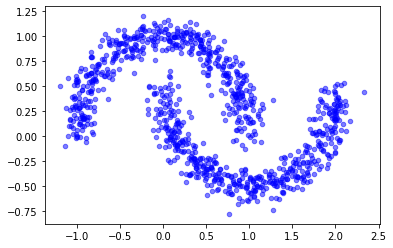

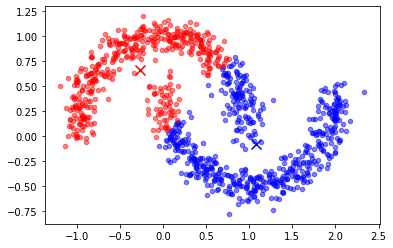

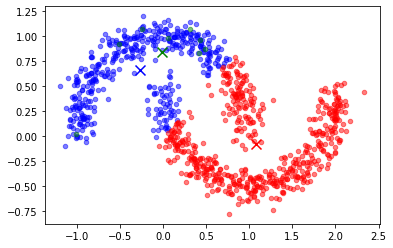

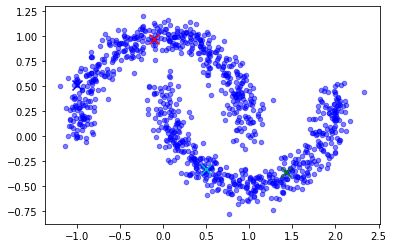

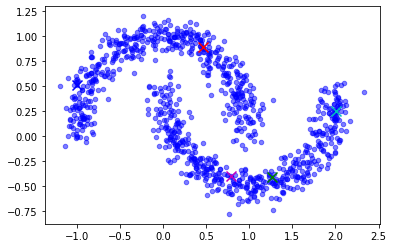

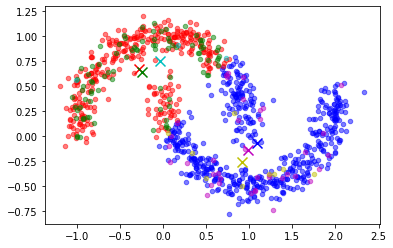

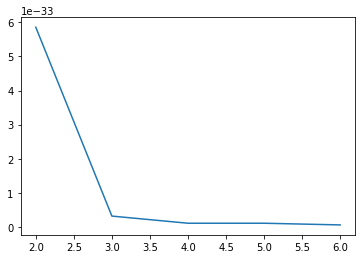

In [32]:
#ex3,pearsond
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
k=[2,3,4,5,6]
dist=[]
display_cluster(X)
for z in k:
 print(z)
 labels,centers,mindisto=GUC_Kmean5(X,z, "pearson")
 plt.figure() 
 display_cluster(X,labels,centers,z)
 dist.append(mindisto)
plt.figure() 
plt.plot(k,dist)
#elbow point 3

In [39]:
data=pd.read_csv("/content/Customerdata.csv")
del data['ID']
data.head()


Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

['Sex', 'Marital status']


C:\Users\hp\AppData\Local\Temp/ipykernel_3728/630129658.py:56: RuntimeWarning: Mean of empty slice.
  Cluster_Centroids[i,:]=Data_points[minind==i].mean(axis=0)
C:\Users\hp\AppData\Local\Temp/ipykernel_3728/594995057.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


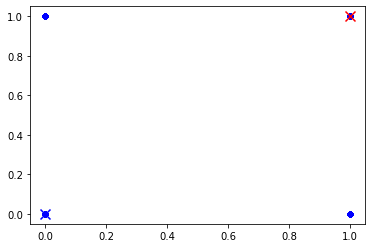

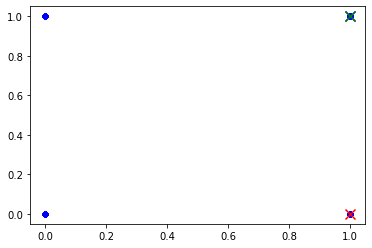

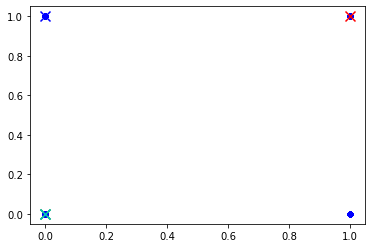

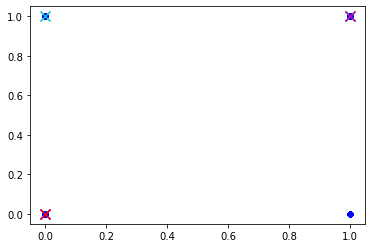

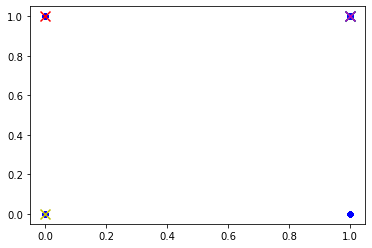

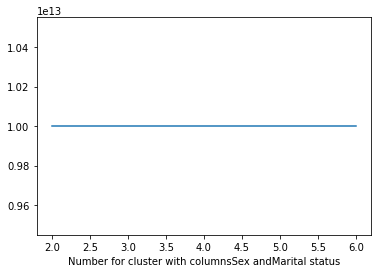

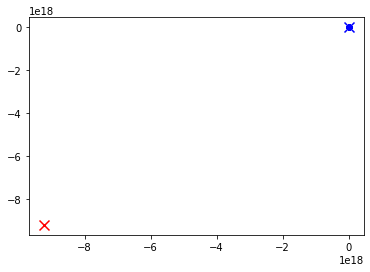

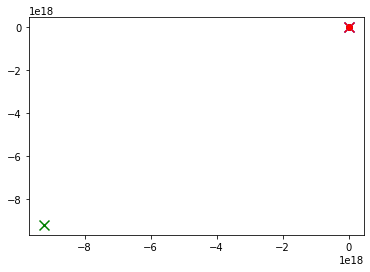

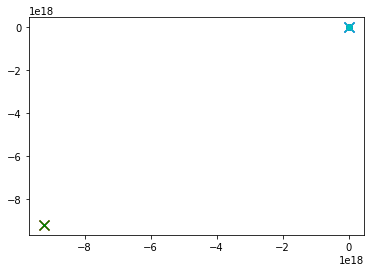

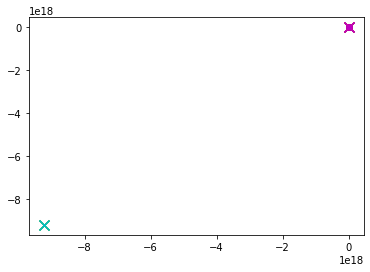

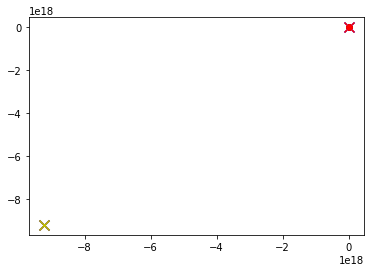

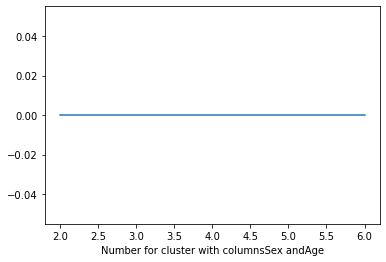

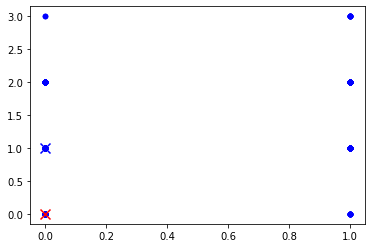

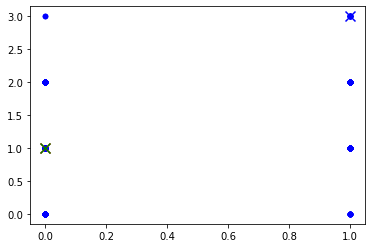

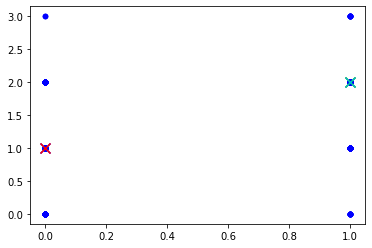

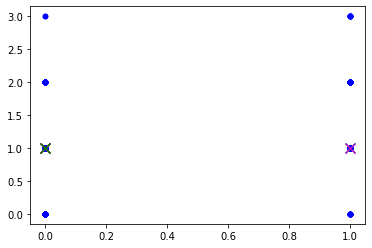

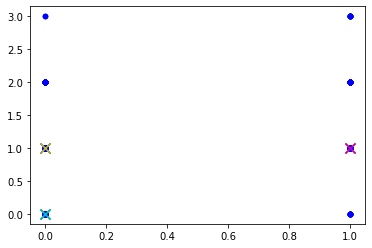

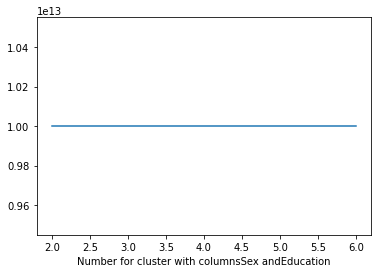

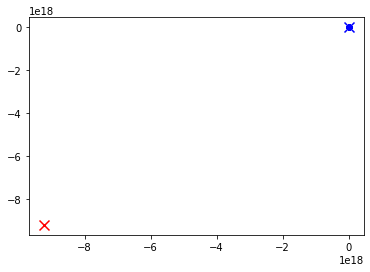

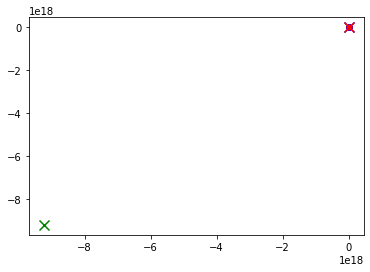

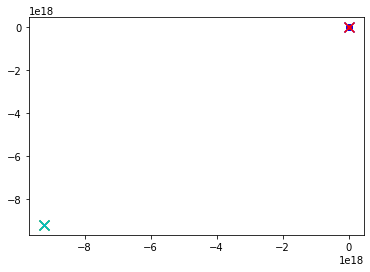

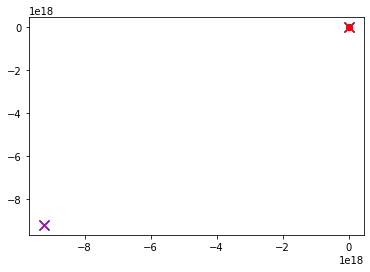

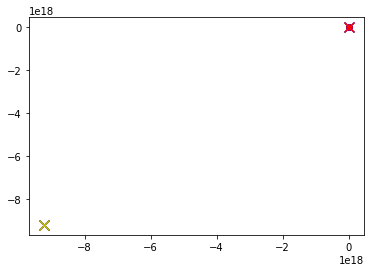

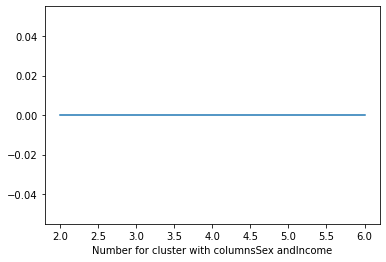

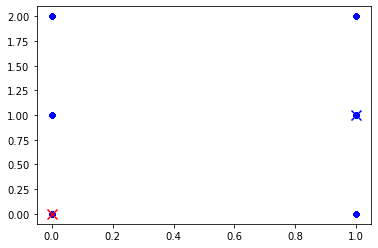

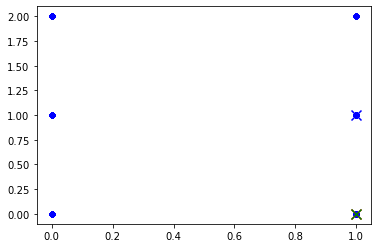

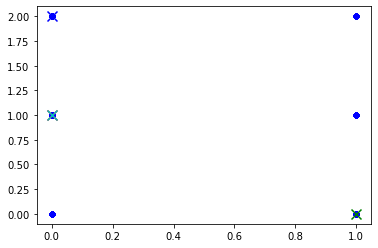

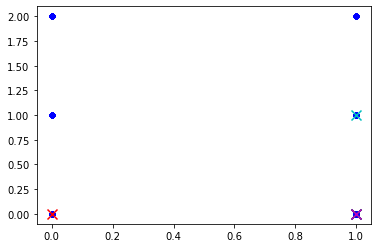

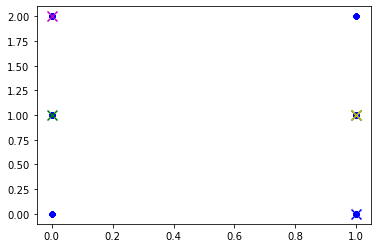

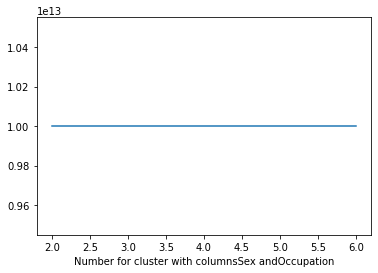

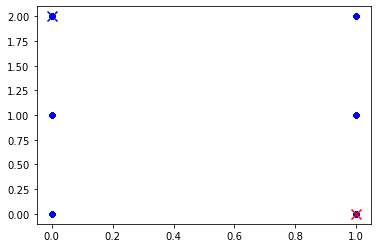

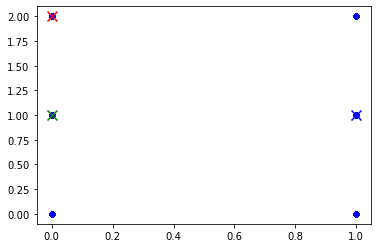

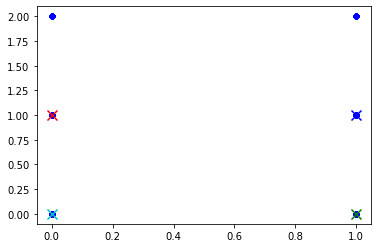

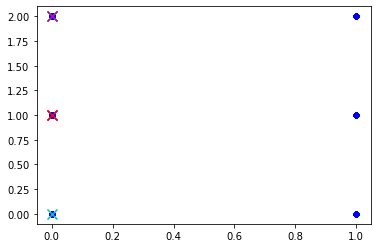

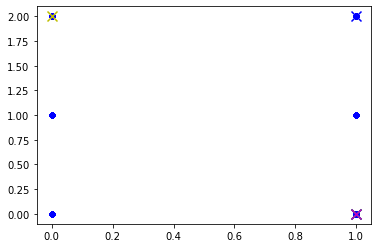

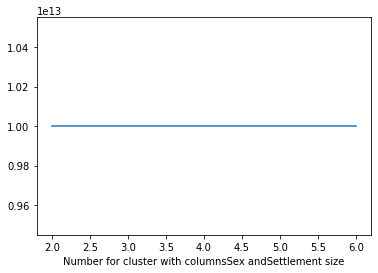

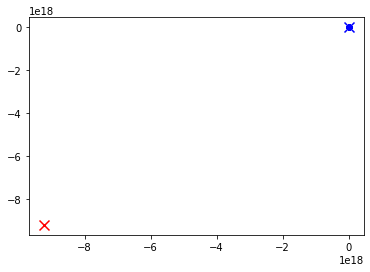

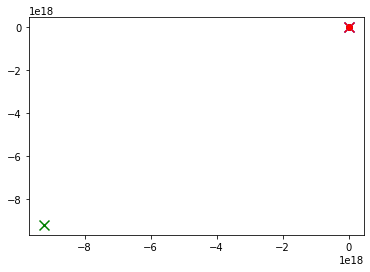

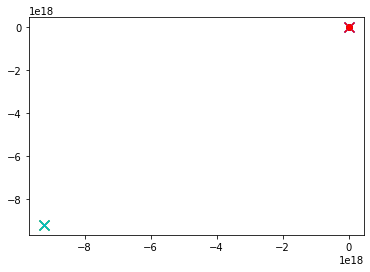

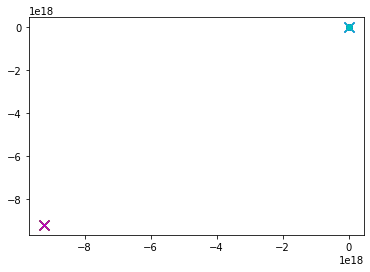

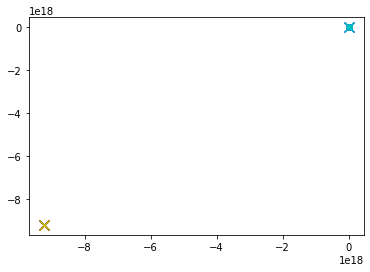

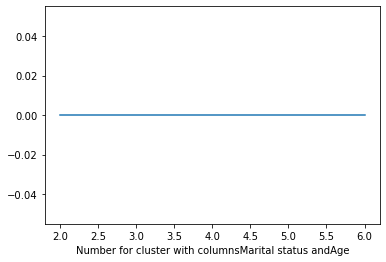

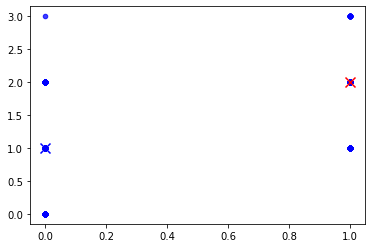

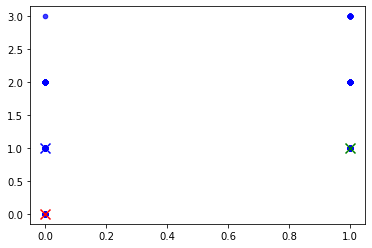

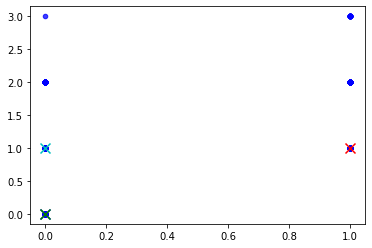

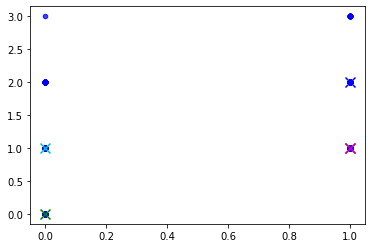

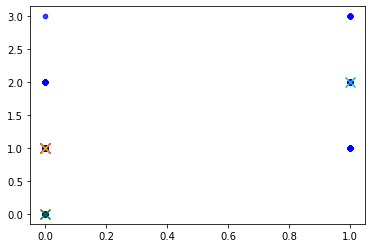

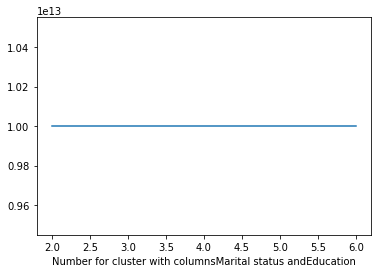

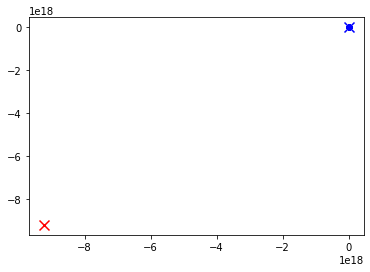

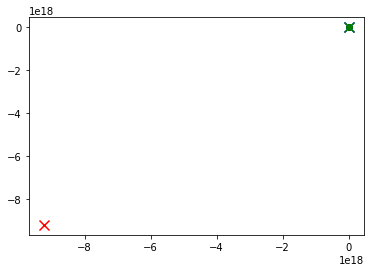

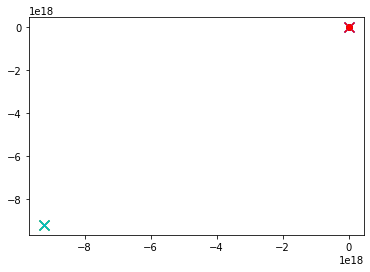

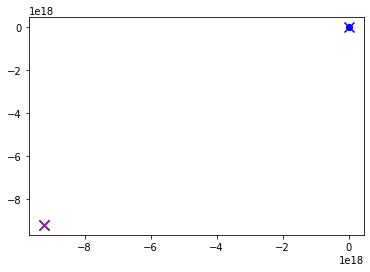

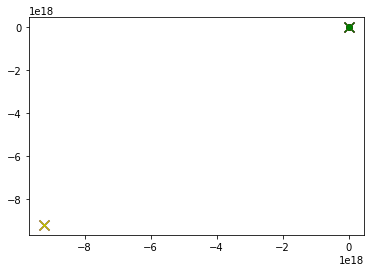

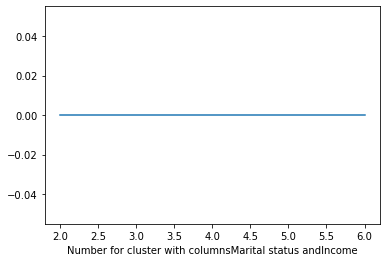

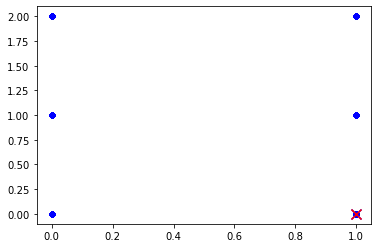

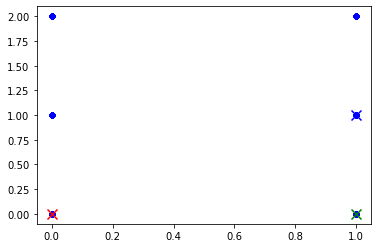

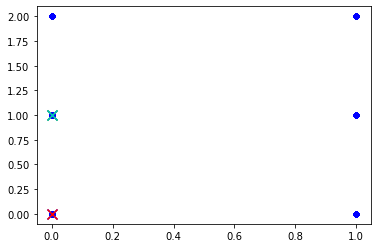

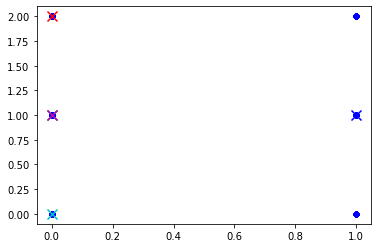

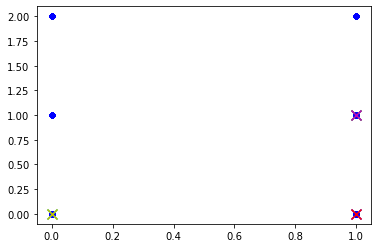

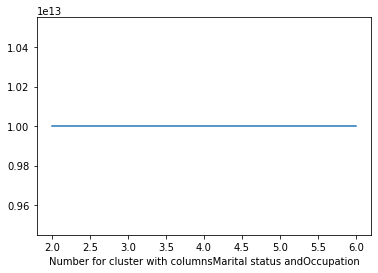

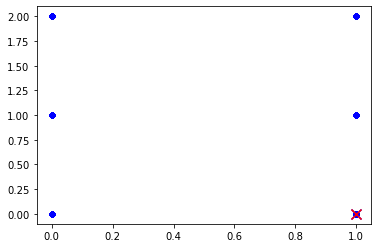

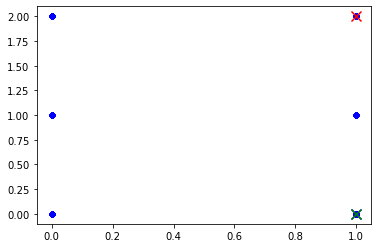

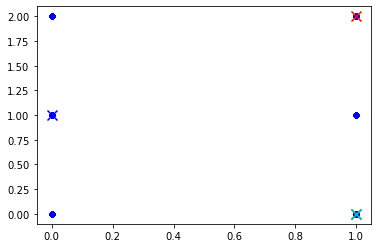

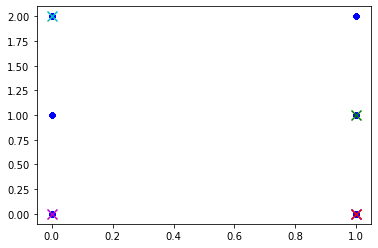

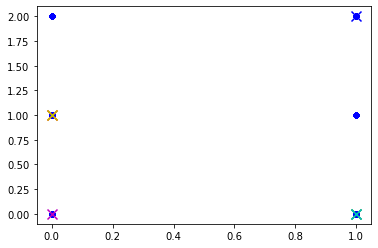

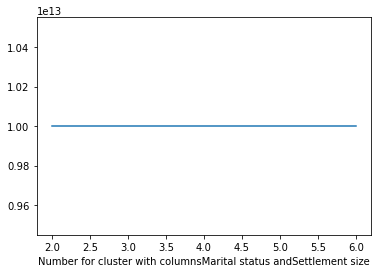

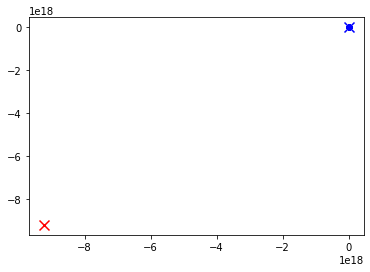

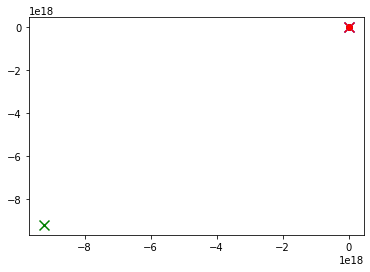

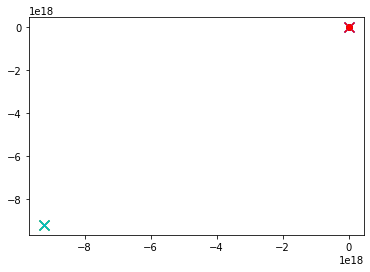

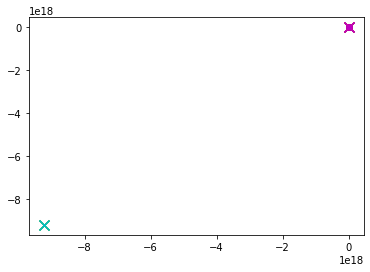

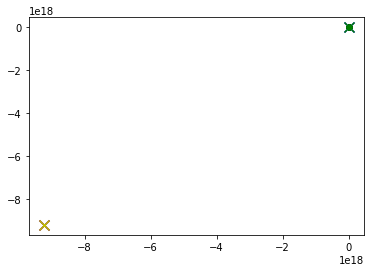

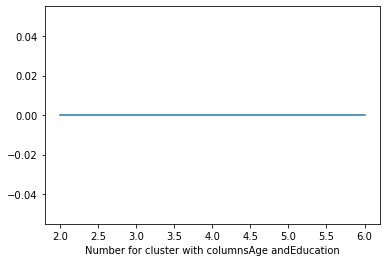

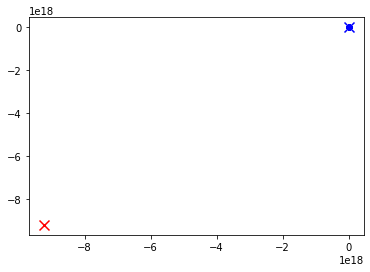

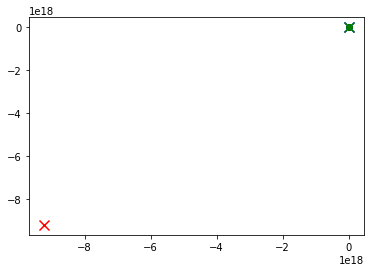

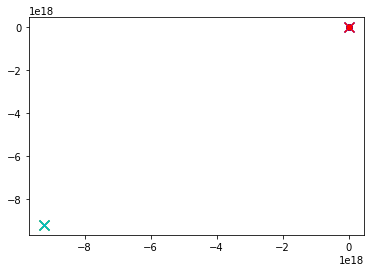

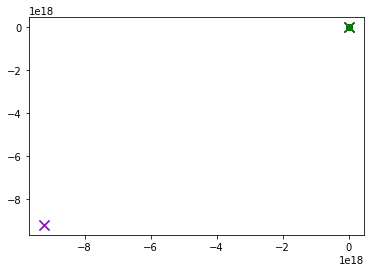

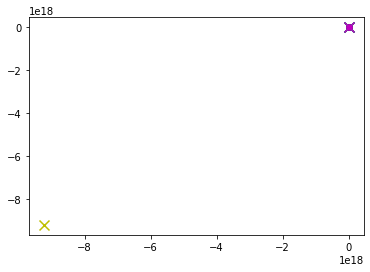

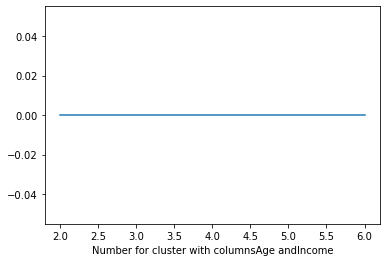

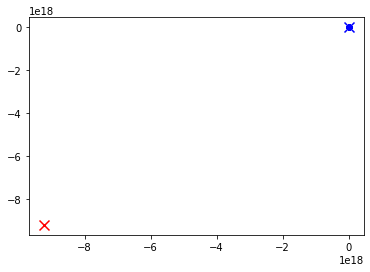

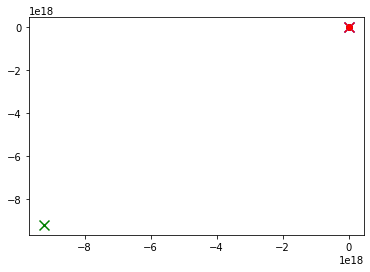

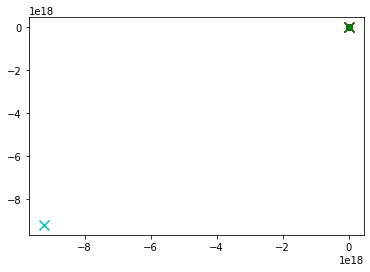

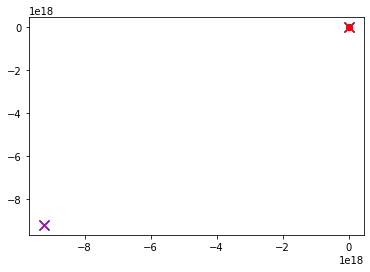

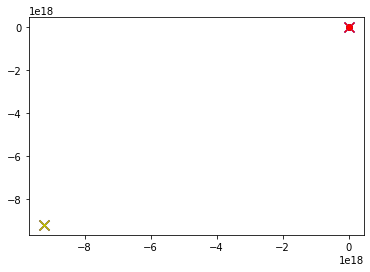

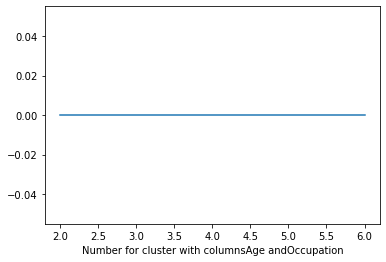

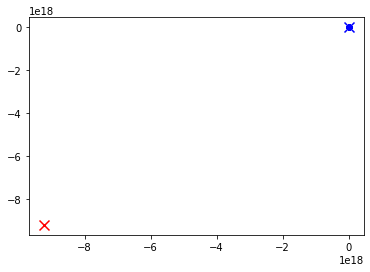

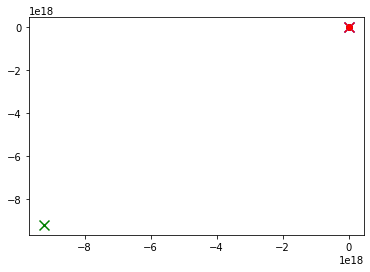

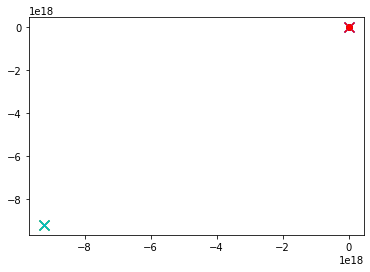

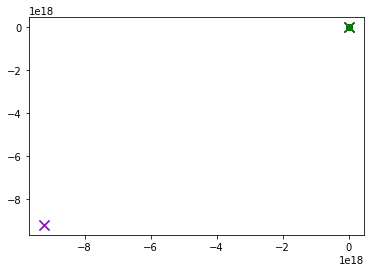

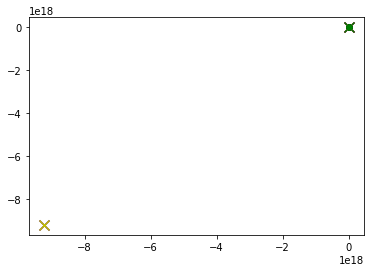

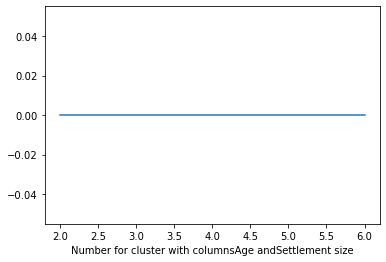

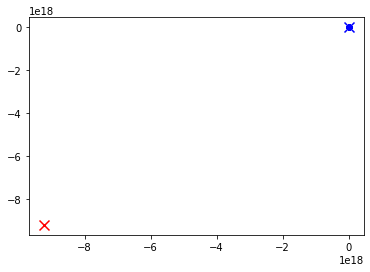

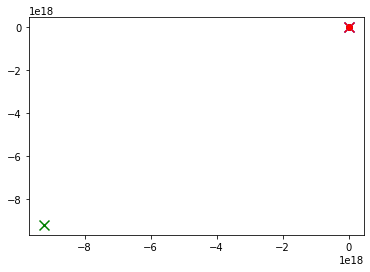

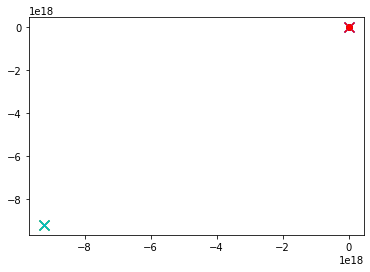

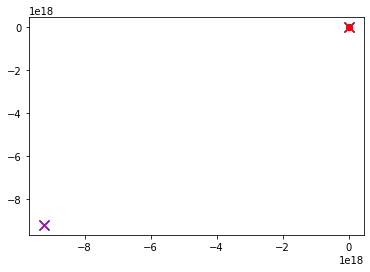

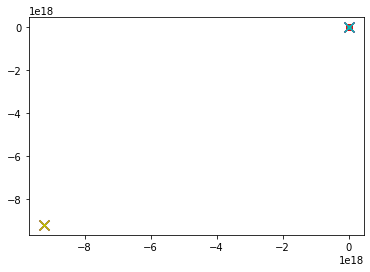

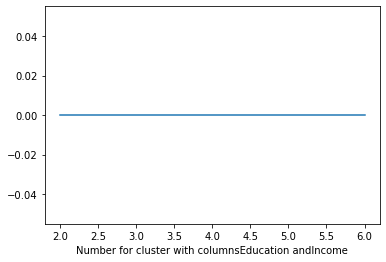

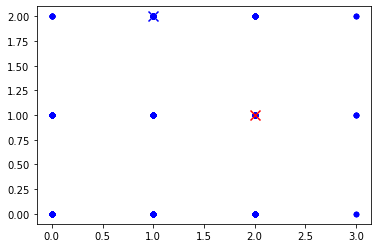

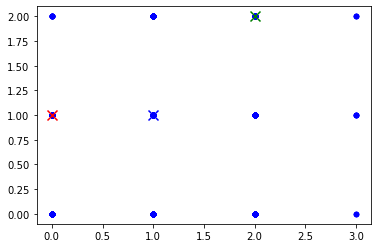

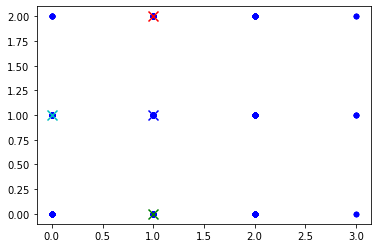

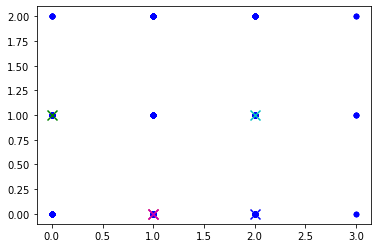

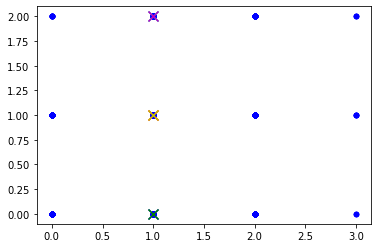

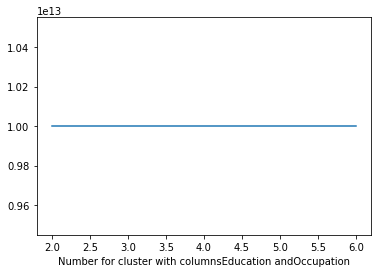

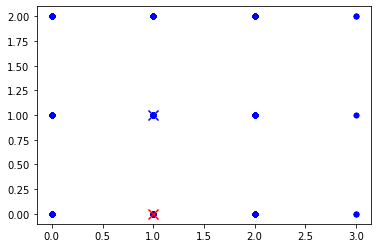

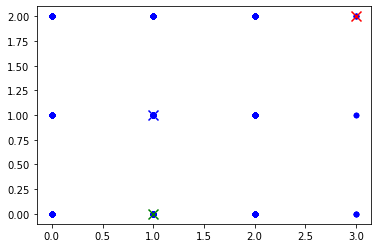

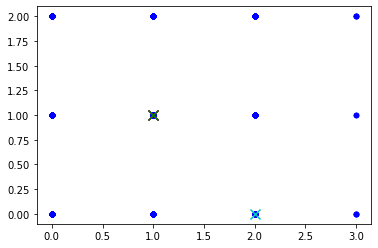

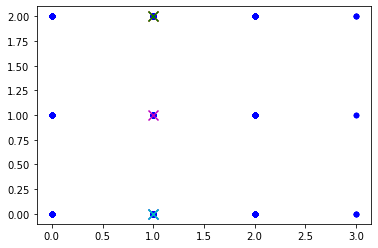

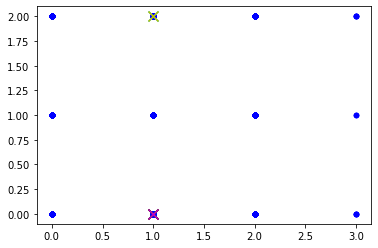

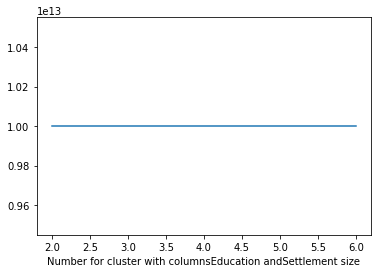

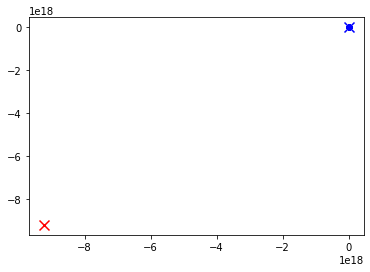

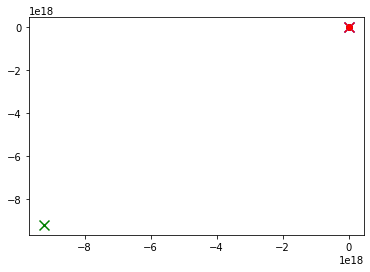

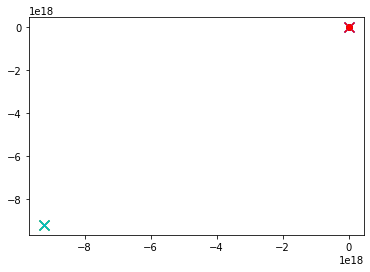

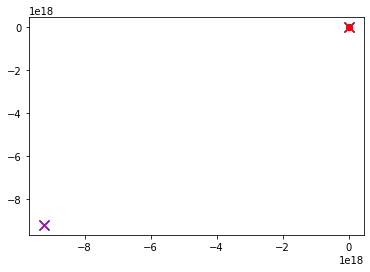

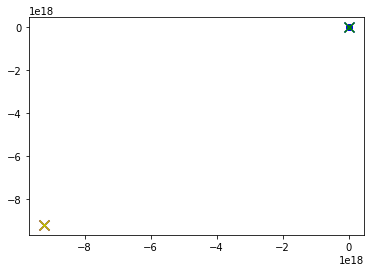

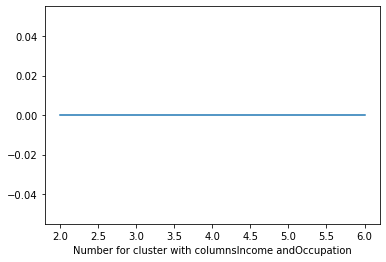

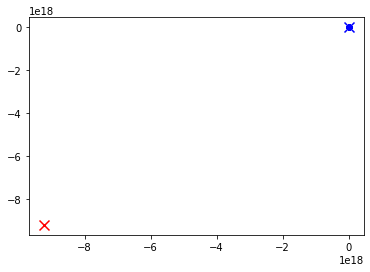

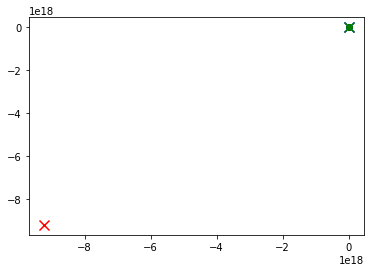

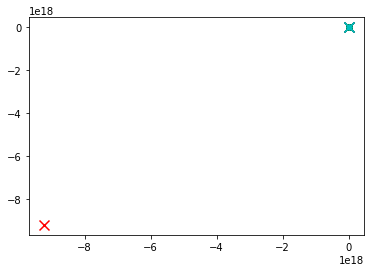

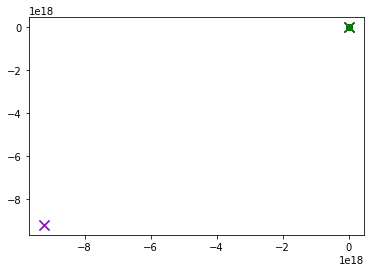

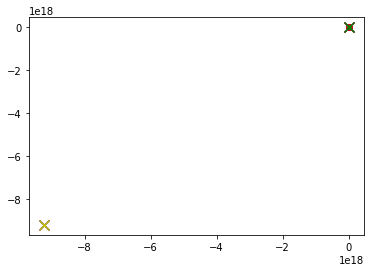

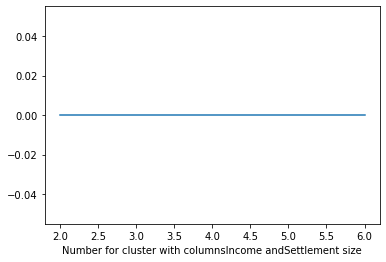

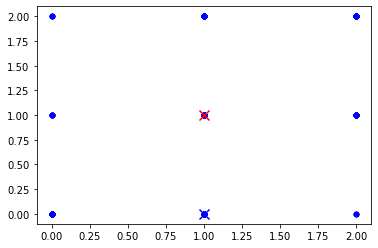

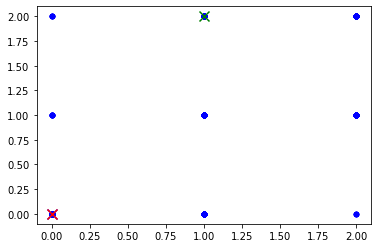

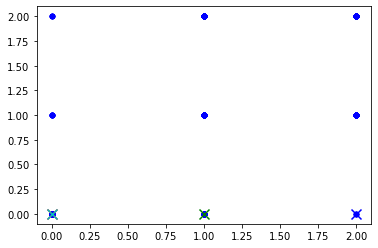

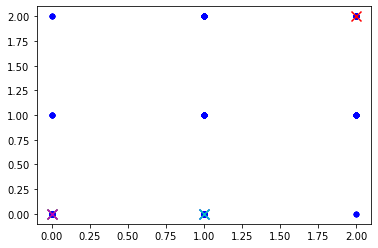

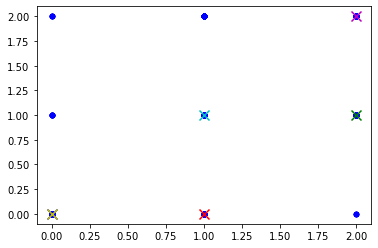

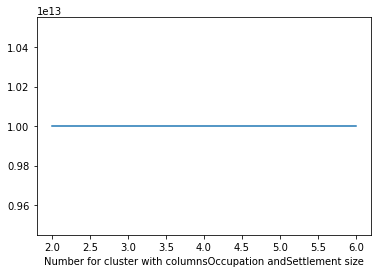

In [ ]:

#data columns ,pearsond,before normalization
import itertools as it
data1=list(it.combinations(data, 2))
print(list(data1[0]))
for i in data1:
    
    df=data[list(i)]
    
    k=[2,3,4,5,6]
    dist=[]

    for z in k:
     #print(z)
     labels,centers,mindisto=GUC_Kmean2(df.values,z, "pearson")
     plt.figure() 
     display_cluster(df.values,labels,centers,z)
     dist.append(mindisto)
    plt.figure() 
    strx=str("Number for cluster"+" "+"with columns"+i[0]+" and"+i[1])
    plt.xlabel(strx)
    plt.plot(k,dist)

In [22]:
#normalizing age and income
from sklearn.preprocessing import MinMaxScaler
x1=pd.DataFrame(data[['Income', 'Age']])
scaler = MinMaxScaler()
#print(x1.head())
scaler.fit(x1)
X_scaled1 = scaler.transform(x1)
X_scaled1 = pd.DataFrame(X_scaled1, columns=["Income2","Age2"])
data["Income"]=X_scaled1["Income2"]
data["Age"]=X_scaled1["Age2"]
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0    0               0  0.844828          2  0.324781           1   
1    1               1  0.068966          1  0.420210           1   
2    0               0  0.534483          1  0.195144           0   
3    0               0  0.465517          1  0.496223           1   
4    0               0  0.603448          1  0.413842           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

2
3
4
5
6
7


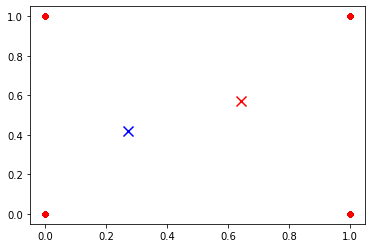

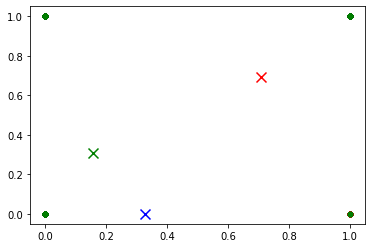

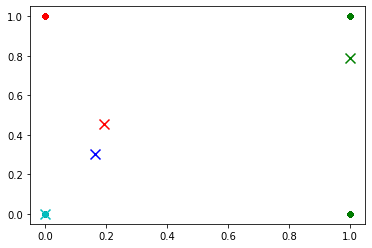

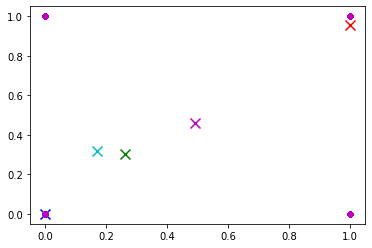

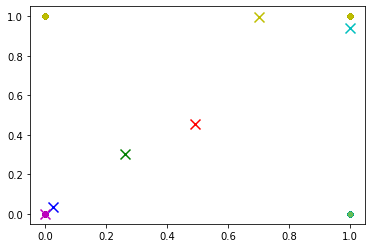

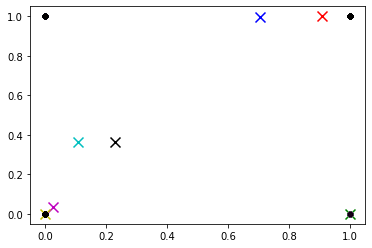

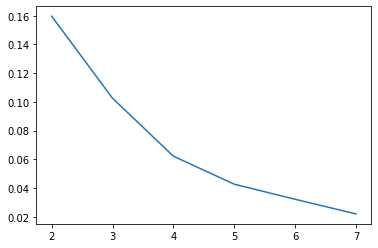

In [ ]:
#after normalization
k=[2,3,4,5,6,7]
dist=[]

for z in k:
     print(z)
     labels,centers,mindisto=GUC_Kmean2(data.values,z, "pearson")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)
#elbow point 4 
    

2
3
4
5
6
7


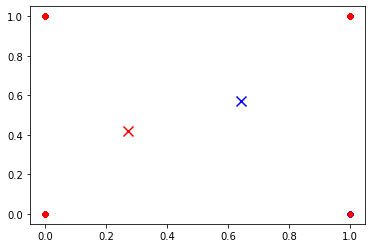

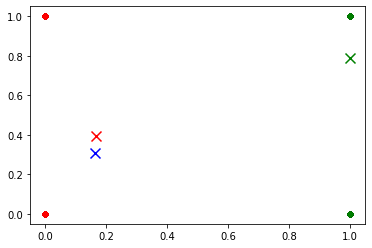

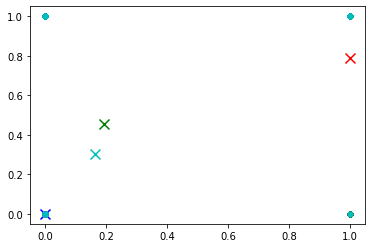

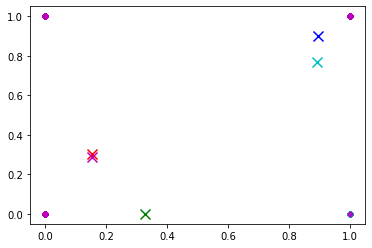

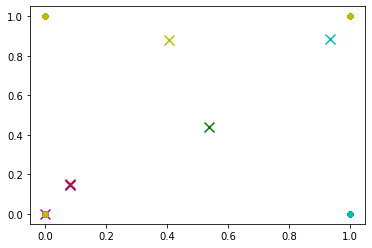

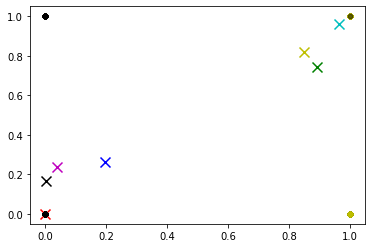

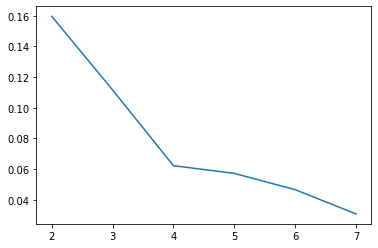

In [23]:
#after normalization
k=[2,3,4,5,6,7]
dist=[]

for z in k:
     print(z)
     labels,centers,mindisto=GUC_Kmean5(data.values,z, "pearson")
     plt.figure() 
     display_cluster(data.values,labels,centers,z)
     dist.append(mindisto)
plt.figure() 

plt.plot(k,dist)
#elbow point 4 